In [1]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_rows', 1000)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from utils import createXYPlot
from utils import getVariables
from datetime import datetime

today = str(datetime.now().date())
print(today)
plots_folder = f"./plots/{today}/iss"
os.system(f"mkdir -p {plots_folder}")

2022-03-05


0

### Iss data

In [2]:
df_ti = pd.read_csv("./data/rapporti_ISS - TI.csv")
df_decessi = pd.read_csv("./data/rapporti_ISS - Decessi.csv")
df_ricoveri = pd.read_csv("./data/rapporti_ISS - Ricoveri.csv")
df_contagi = pd.read_csv("./data/rapporti_ISS - Contagi.csv")
df_pop = pd.read_csv("./data/rapporti_ISS - Popolazione.csv")

In [3]:
cols_to_select = [x for x in df_pop.columns if "frac" not in x and x != "cut"]
df_pop = df_pop[cols_to_select]
df_pop["data"] = pd.to_datetime(df_pop["data"]).dt.date
df_pop = df_pop.rename(columns={"data":"data_pop"})

In [4]:
df_dict = {
    "contagi": df_contagi,
    "ricoveri": df_ricoveri,
    "terapie_intensive": df_ti, 
    "decessi": df_decessi
}

In [5]:
for d in df_dict.items():
    d[1]["split"] = d[0]

In [6]:
df_iss = pd.concat(df_dict.values()).reset_index(drop=True)
df_iss["tot"] = df_iss["vax"] + df_iss["no_vax"]
df_iss["data"] = pd.to_datetime(df_iss["data"]).dt.date

In [7]:
df_iss.groupby("data").count()

fascia_eta  no_vax  1_dose  2_dosi_lt_cut  2_dosi_gt_cut  booster  \
data                                                                            
2021-10-17           5       5       5              5              5        5   
2021-10-24          15      15      15             15             15       15   
2021-10-31          15      15      15             15             15       15   
2021-11-07          20      20      20             20             20       20   
2021-11-14          20      20      20             20             20       20   
2021-11-21          20      20      20             20             20       20   
2021-11-28          20      20      20             20             20       20   
2021-12-05          20      20      20             20             20       20   
2021-12-12          20      20      20             20             20       20   
2021-12-19          20      20      20             20             20       20   
2021-12-26          20      20      20             20             20       20   
2022-01-02          20      20      20             20             20       20   
2022-01-09          20      20      20             20             20       20   
2022-01-16          20      20      20             20             20       20   
2022-01-23          20      20      20             20             20       20   
2022-01-30          20      20      20             20             20       20   
2022-02-06          20      20      20             20             20       20   
2022-02-13          15      15      15             15             15       15   
2022-02-20           5       5       5              5              5        5   
2022-02-27           5       5       5              5              5        5   

            vax  no_vax_frac  1_dose_frac  2_dosi_lt_cut_frac  \
data                                                            
2021-10-17    5            5            5                   5   
2021-10-24   15           15           15                  15   
2021-10-31   15           15           15                  15   
2021-11-07   20           20           20                  20   
2021-11-14   20           20           20                  20   
2021-11-21   20           20           20                  20   
2021-11-28   20           20           20                  20   
2021-12-05   20           20           20                  20   
2021-12-12   20           20           20                  20   
2021-12-19   20           20           20                  20   
2021-12-26   20           20           20                  20   
2022-01-02   20           20           20                  20   
2022-01-09   20           20           20                  20   
2022-01-16   20           20           20                  20   
2022-01-23   20           20           20                  20   
2022-01-30   20           20           20                  20   
2022-02-06   20           20           20                  20   
2022-02-13   15           15           15                  15   
2022-02-20    5            5            5                   5   
2022-02-27    5            5            5                   5   

            2_dosi_gt_cut_frac  booster_frac  vax_frac  cut  split  tot  
data                                                                     
2021-10-17                   5             5         5    5      5    5  
2021-10-24                  15            15        15   15     15   15  
2021-10-31                  15            15        15   15     15   15  
2021-11-07                  20            20        20   20     20   20  
2021-11-14                  20            20        20   20     20   20  
2021-11-21                  20            20        20   20     20   20  
2021-11-28                  20            20        20   20     20   20  
2021-12-05                  20            20        20   20     20   20  
2021-12-12                  20            20        20   2

In [8]:
age_values = df_iss["fascia_eta"].unique()
splits = df_iss["split"].unique()

In [9]:
from datetime import timedelta
df_iss["data_pop"] = df_iss["data"].apply(lambda x: x - timedelta(14))

In [10]:
df_iss = df_iss.merge(df_pop, on=["data_pop","fascia_eta"], how="left", suffixes=("","_pop"))

### Incidence

In [11]:
df_iss.columns

Index(['data', 'fascia_eta', 'no_vax', '1_dose', '2_dosi_lt_cut',
       '2_dosi_gt_cut', 'booster', 'vax', 'no_vax_frac', '1_dose_frac',
       '2_dosi_lt_cut_frac', '2_dosi_gt_cut_frac', 'booster_frac', 'vax_frac',
       'cut', 'split', 'tot', 'data_pop', 'no_vax_pop', '1_dose_pop',
       '2_dosi_lt_cut_pop', '2_dosi_gt_cut_pop', 'booster_pop', 'vax_pop',
       'tot_pop'],
      dtype='object')

In [12]:
vnames = ["no_vax", "vax", "1_dose", "2_dosi_lt_cut", "2_dosi_gt_cut", "booster"]
for v in vnames:
    df_iss[f"{v}_100k"] = 1e5 * df_iss[v]/df_iss[f"{v}_pop"]
    df_iss[f"{v}_100k_sd"] = 1e5 * np.sqrt((df_iss[v]/df_iss[f"{v}_pop"]) * (1 - df_iss[v]/df_iss[f"{v}_pop"]) / df_iss[f"{v}_pop"])
    df_iss[f"err_{v}_100k"] = 1.645 * df_iss[f"{v}_100k_sd"]
    if vnames != "no_vax":
        df_iss[f"eff_{v}"] = 100 * (1 - df_iss[f"{v}_100k"]/df_iss[f"no_vax_100k"])
        df_iss[f"eff_{v}_sd"] = 100 * np.sqrt((df_iss[f"no_vax_100k"]**-2 * df_iss[f"{v}_100k_sd"]**2 + 
                                              df_iss[f"no_vax_100k"]**-4 * df_iss[f"{v}_100k"]**2 * df_iss[f"no_vax_100k_sd"]**2))
        df_iss[f"err_eff_{v}"] = 1.645 * df_iss[f"eff_{v}_sd"]
        df_iss[f"arr_{v}"] = (df_iss[f"no_vax_100k"] - df_iss[f"{v}_100k"]) / 1000
        df_iss[f"err_arr_{v}"] = 1.645 * np.sqrt(df_iss[f"no_vax_100k_sd"]**2 + df_iss[f"{v}_100k_sd"]**2) / 1000


In [13]:
df_iss[df_iss.split=="decessi"][[f"arr_vax","split"]]

arr_vax    split
255       NaN  decessi
256       NaN  decessi
257       NaN  decessi
258       NaN  decessi
259       NaN  decessi
260       NaN  decessi
261       NaN  decessi
262       NaN  decessi
263       NaN  decessi
264       NaN  decessi
265       NaN  decessi
266       NaN  decessi
267       NaN  decessi
268       NaN  decessi
269       NaN  decessi
270  0.000212  decessi
271  0.001584  decessi
272  0.015324  decessi
273  0.087965  decessi
274  0.004645  decessi
275  0.000197  decessi
276  0.001883  decessi
277  0.018739  decessi
278  0.114270  decessi
279  0.006074  decessi
280  0.000176  decessi
281  0.001817  decessi
282  0.022741  decessi
283  0.134828  decessi
284  0.007292  decessi
285  0.000237  decessi
286  0.002345  decessi
287  0.026534  decessi
288  0.162793  decessi
289  0.008844  decessi
290  0.000211  decessi
291  0.002552  decessi
292  0.031927  decessi
293  0.200003  decessi
294  0.010770  decessi
295  0.000249  decessi
296  0.002988  decessi
297  0.037329  decessi
298  0.243015  decessi
299  0.012970  decessi
300  0.000282  decessi
301  0.003855  decessi
302  0.045499  decessi
303  0.318109  decessi
304  0.016907  decessi
305  0.000332  decessi
306  0.004920  decessi
307  0.058316  decessi
308  0.394224  decessi
309  0.021622  decessi
310  0.000411  decessi
311  0.005930  decessi
312  0.073262  decessi
313  0.467932  decessi
314  0.026555  decessi
315  0.000667  decessi
316  0.008187  decessi
317  0.087768  decessi
318  0.597515  decessi
319  0.034019  decessi
320  0.001000  decessi
321  0.009368  decessi
322  0.103093  decessi
323  0.758935  decessi
324  0.041781  decessi
325  0.000964  decessi
326  0.008301  decessi
327  0.106006  decessi
328  0.772045  decessi
329  0.044043  decessi
330  0.000934  decessi
331  0.007534  decessi
332  0.107462  decessi
333  0.875568  decessi
334  0.046442  decessi
335  0.000936  decessi
336  0.005872  decessi
337  0.104486  decessi
338  0.915574  decessi
339  0.044936  decessi

In [134]:
"2_dosi_l_cut_100k" in df_iss.columns

True

<Figure size 900x450 with 0 Axes>

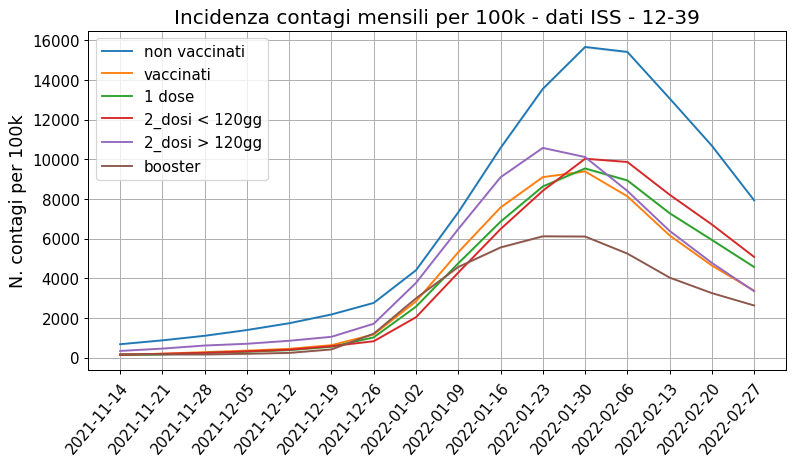

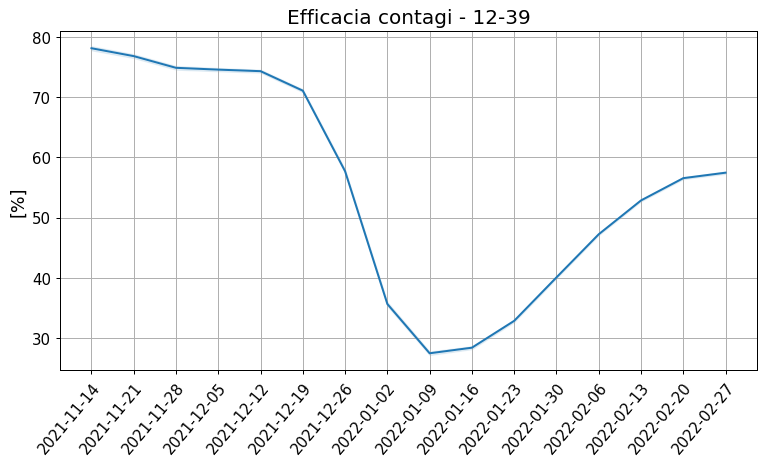

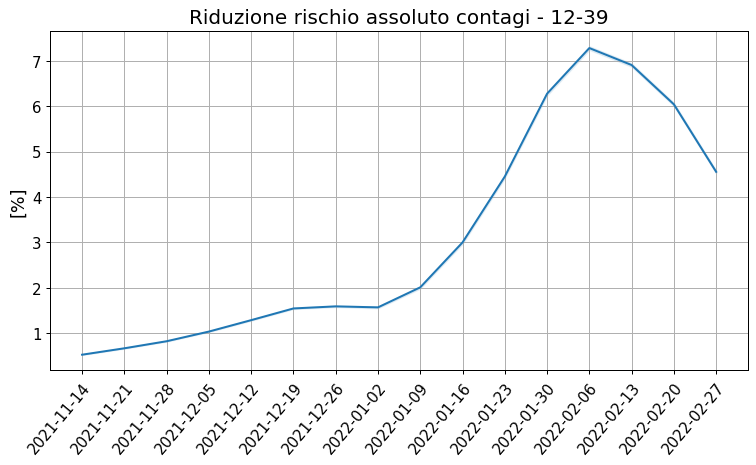

<Figure size 900x450 with 0 Axes>

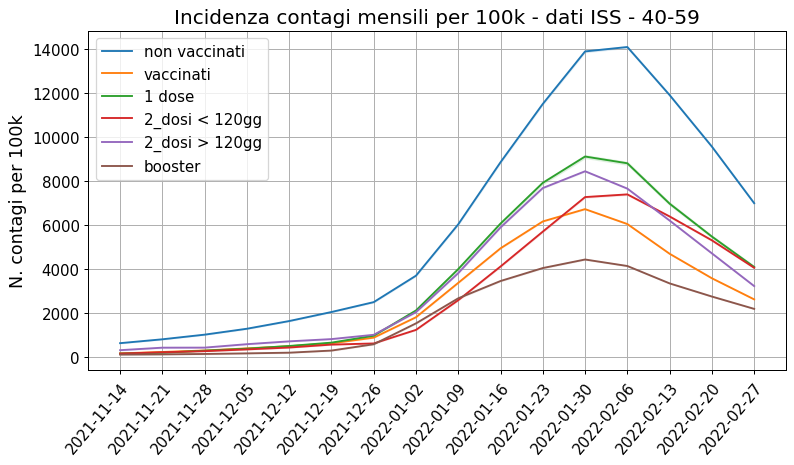

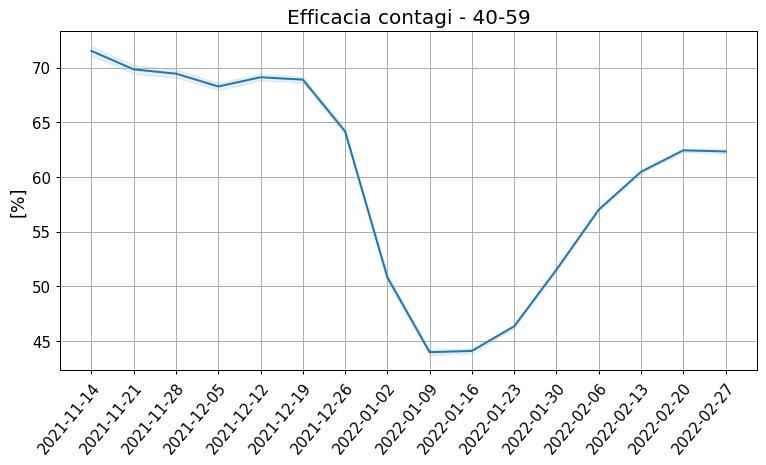

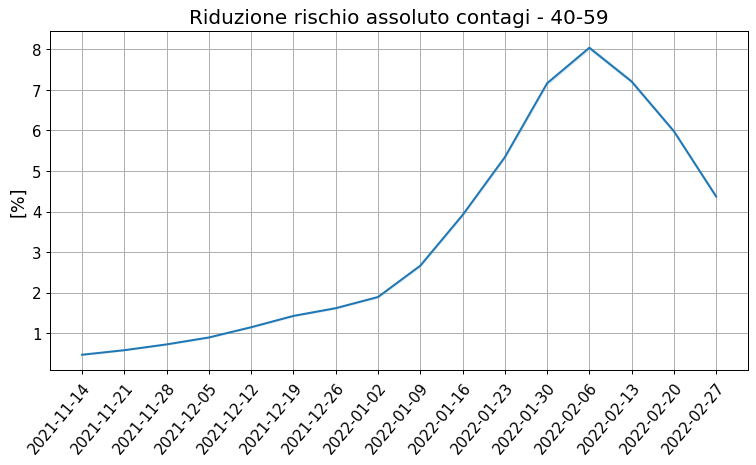

<Figure size 900x450 with 0 Axes>

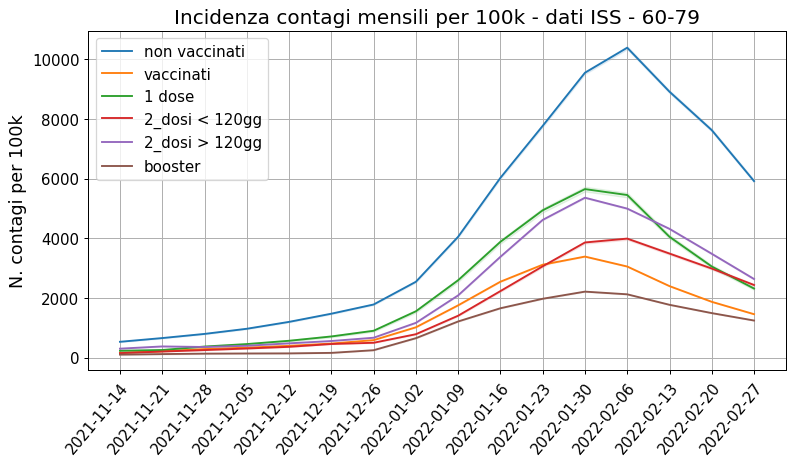

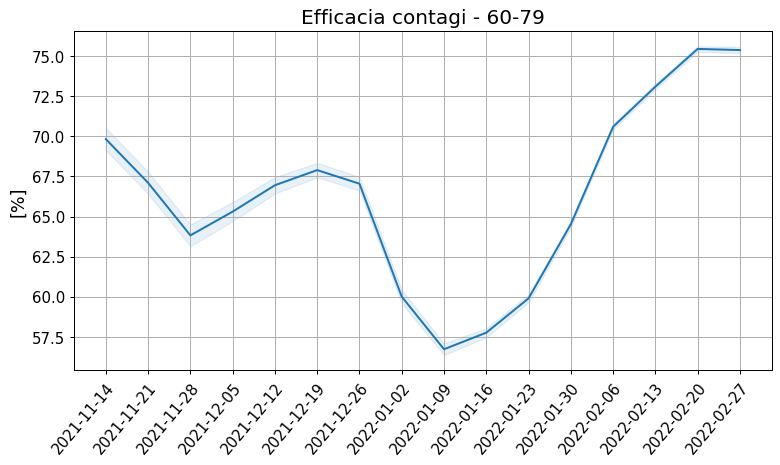

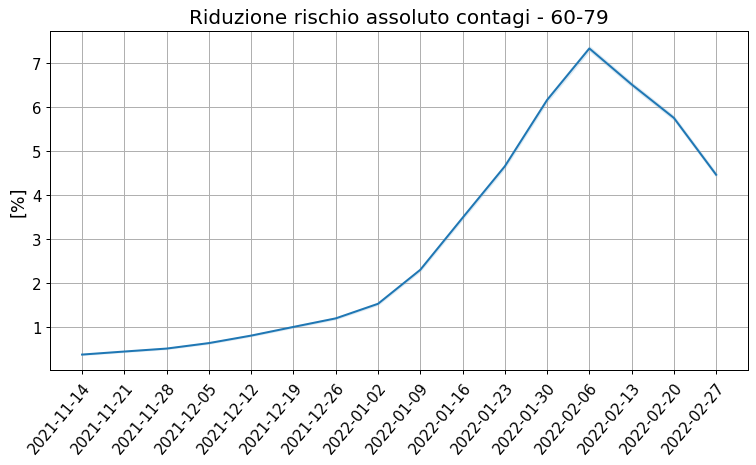

<Figure size 900x450 with 0 Axes>

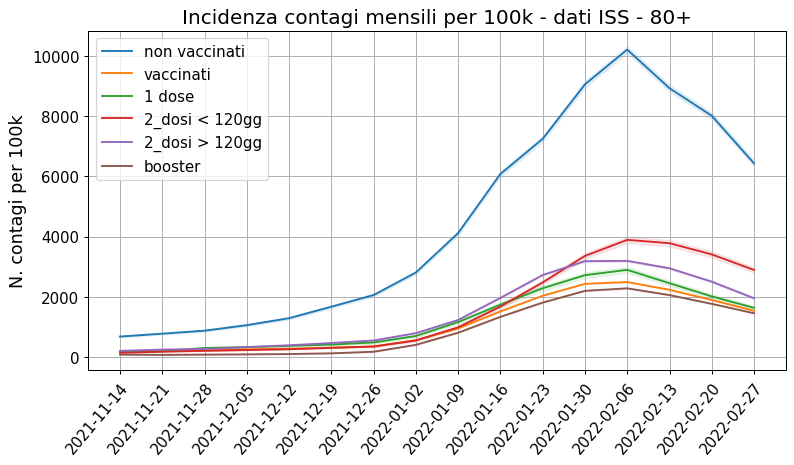

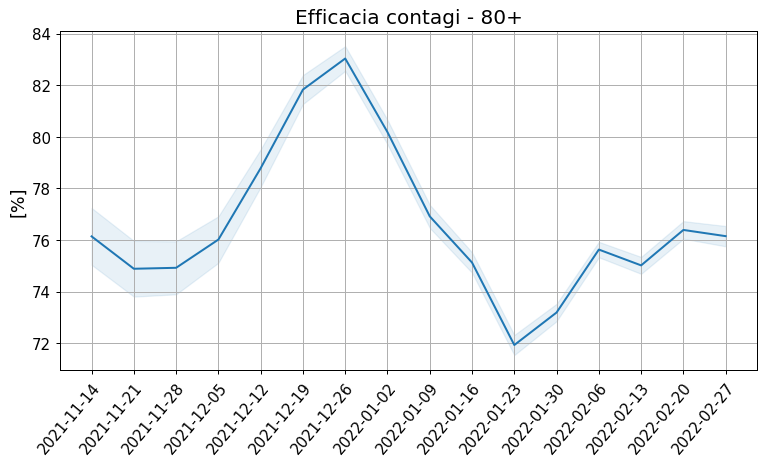

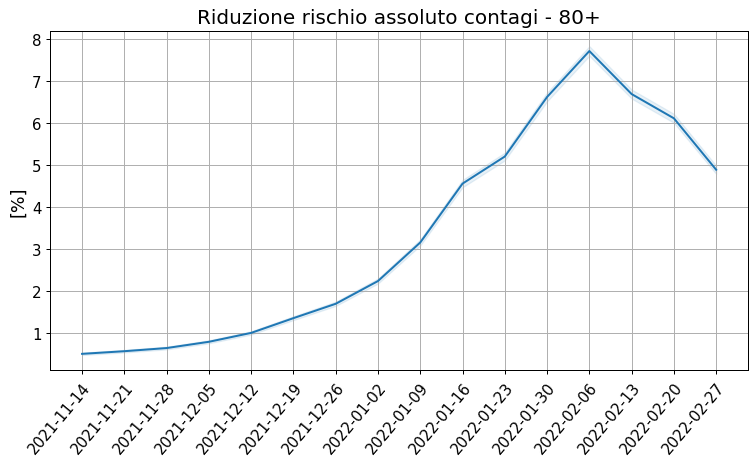

<Figure size 900x450 with 0 Axes>

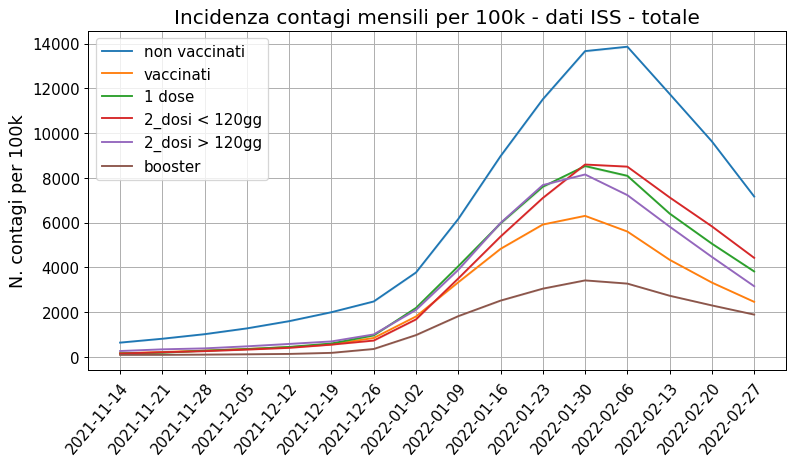

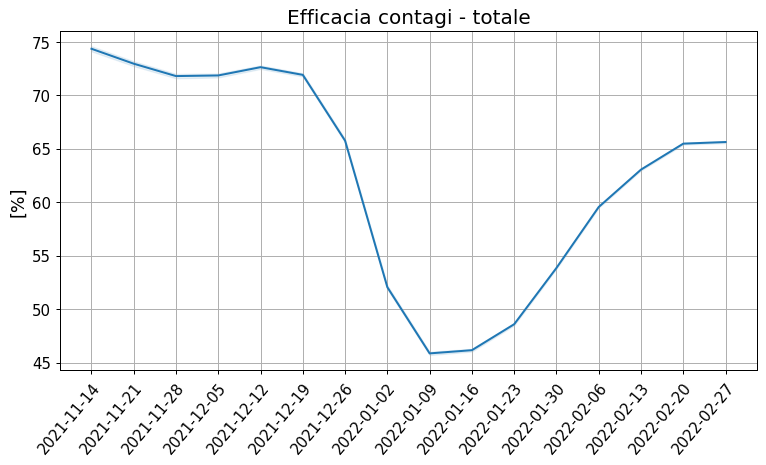

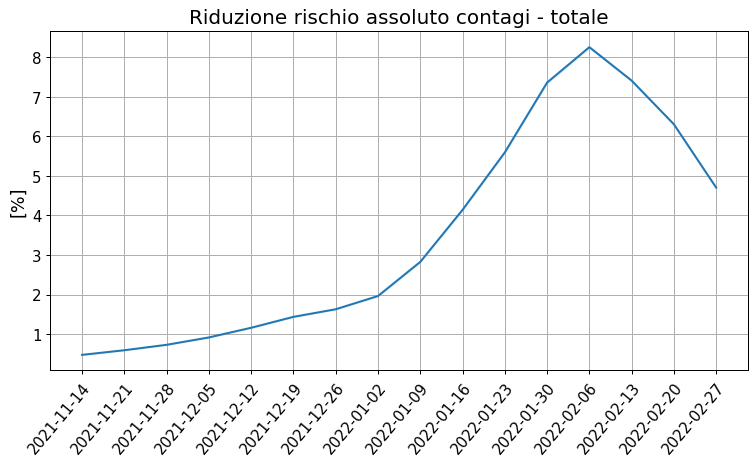

<Figure size 900x450 with 0 Axes>

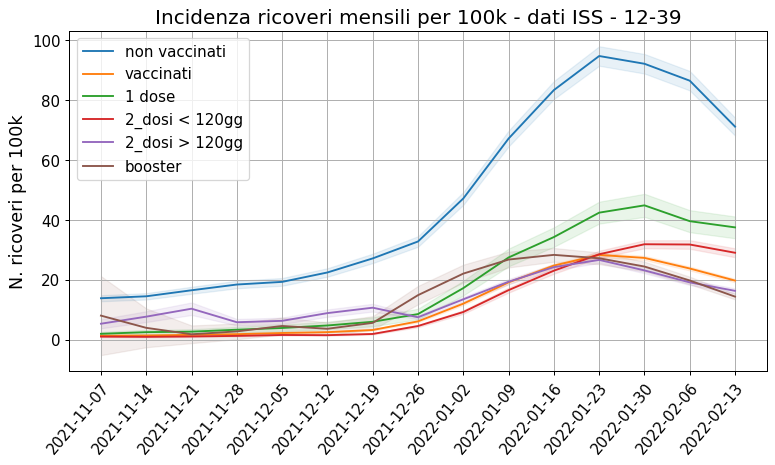

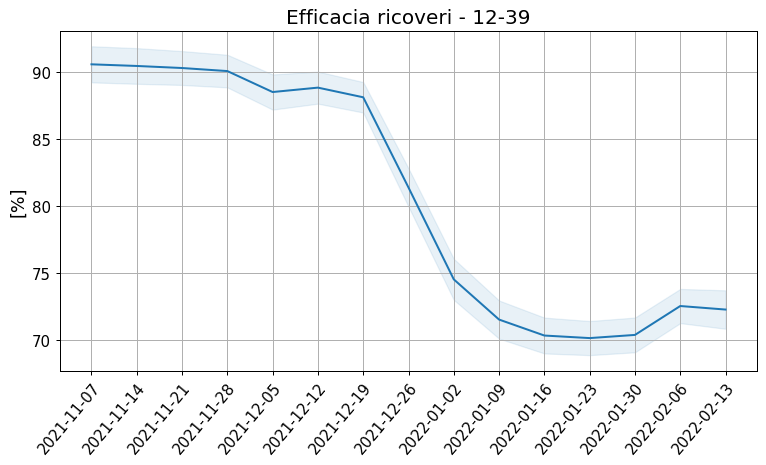

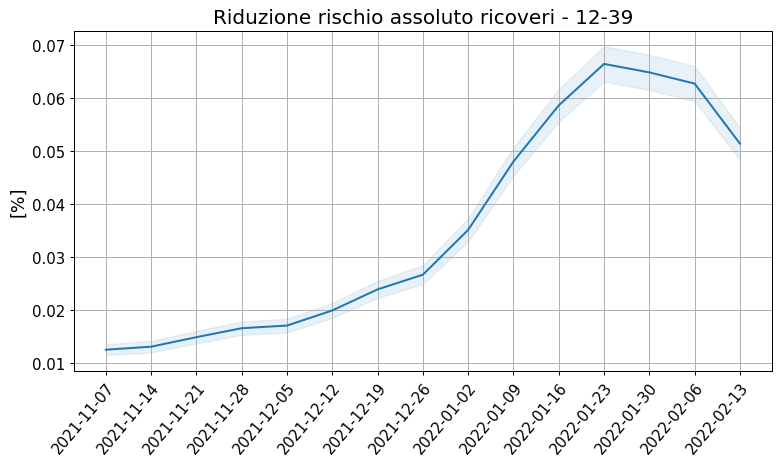

<Figure size 900x450 with 0 Axes>

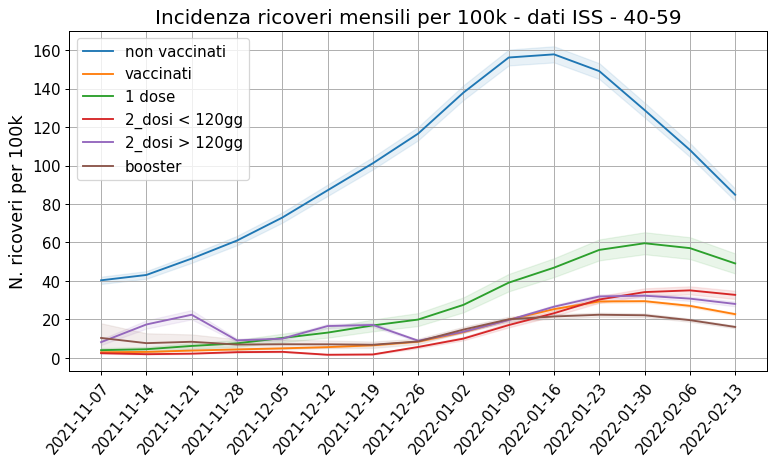

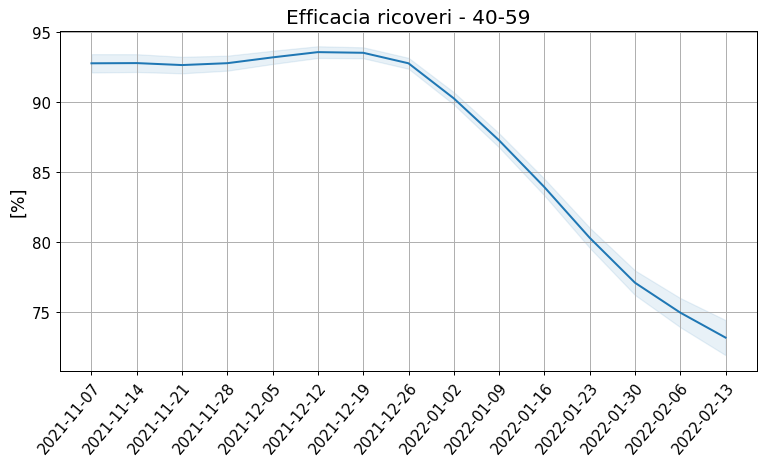

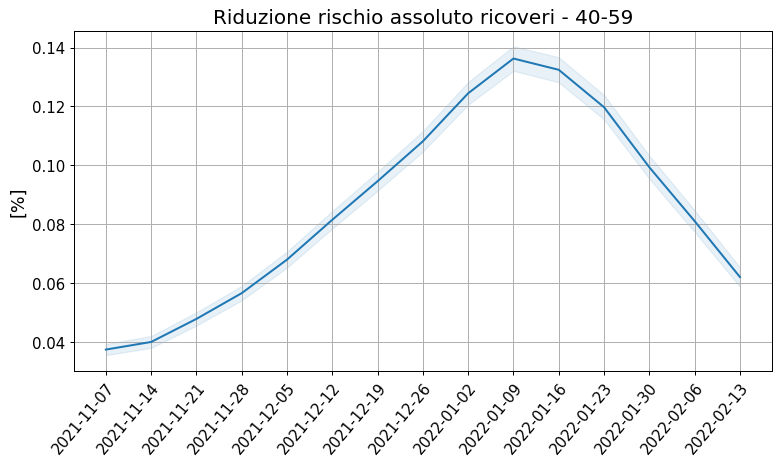

<Figure size 900x450 with 0 Axes>

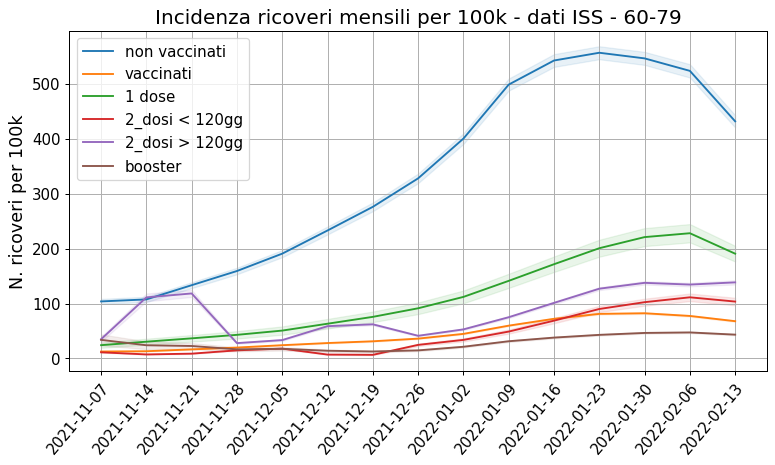

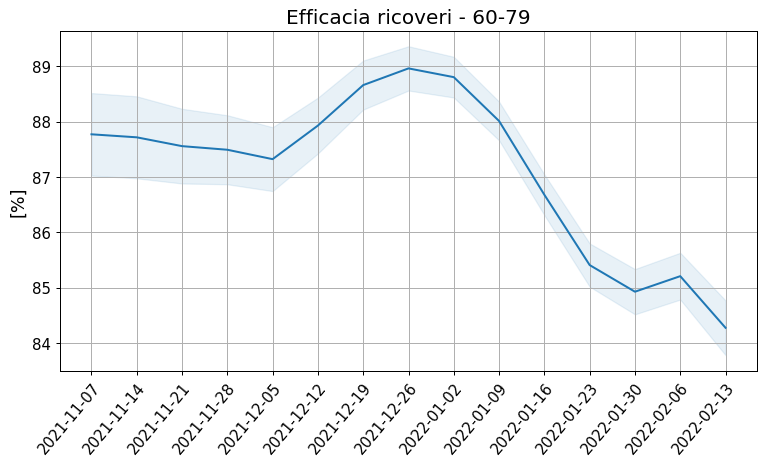

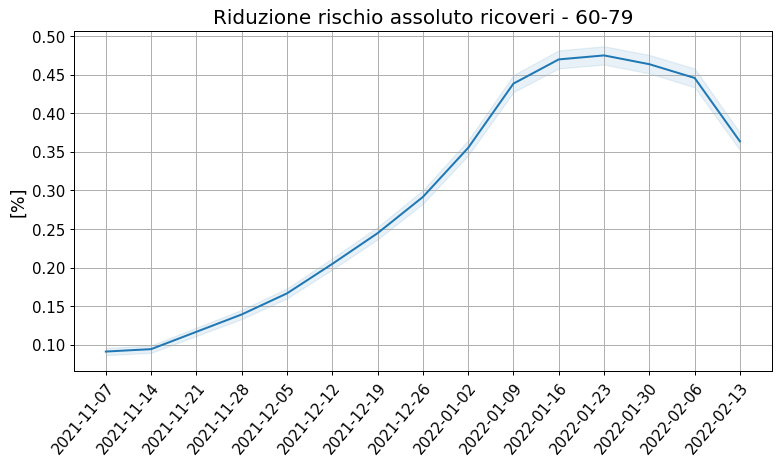

<Figure size 900x450 with 0 Axes>

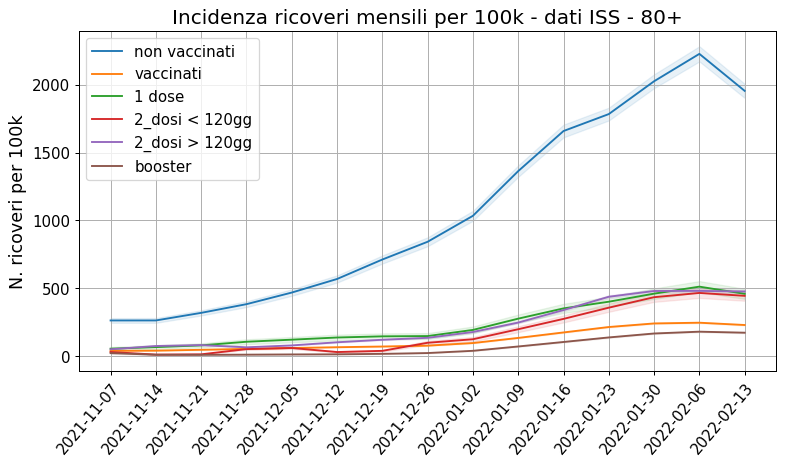

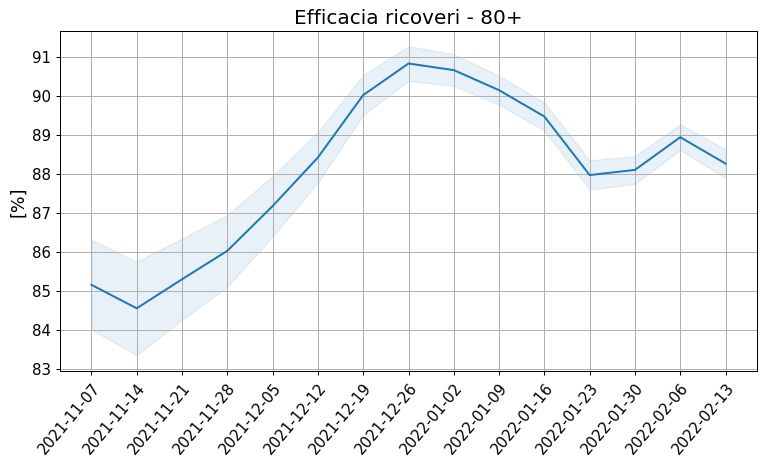

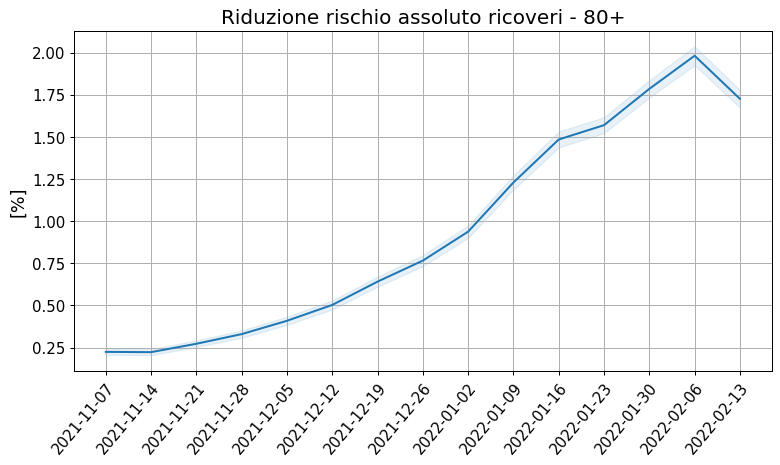

<Figure size 900x450 with 0 Axes>

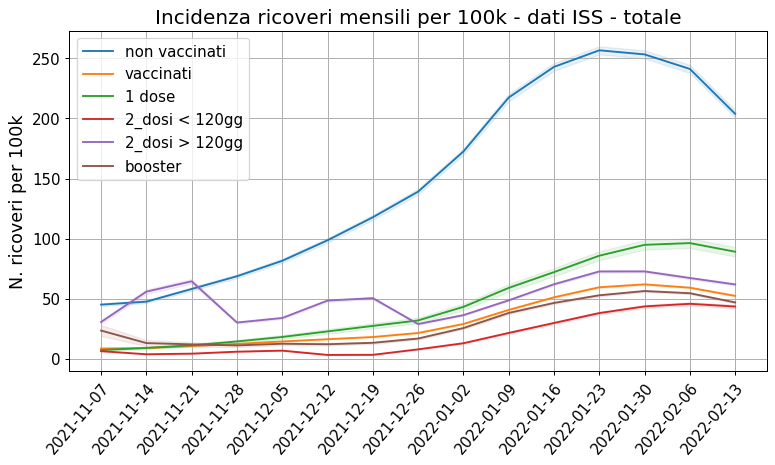

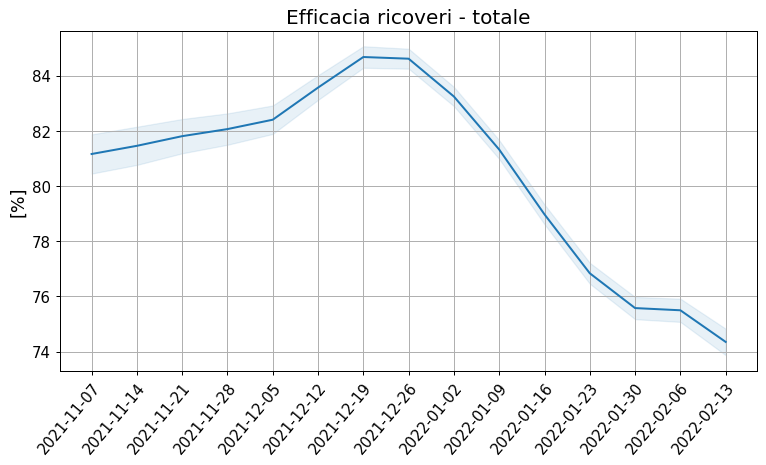

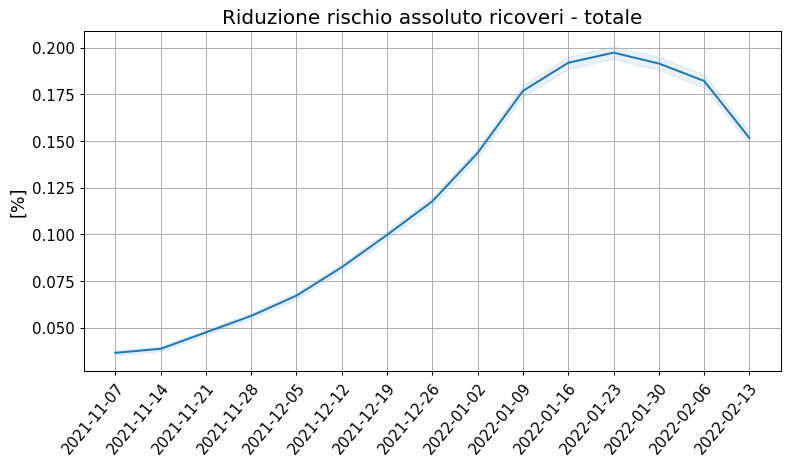

<Figure size 900x450 with 0 Axes>

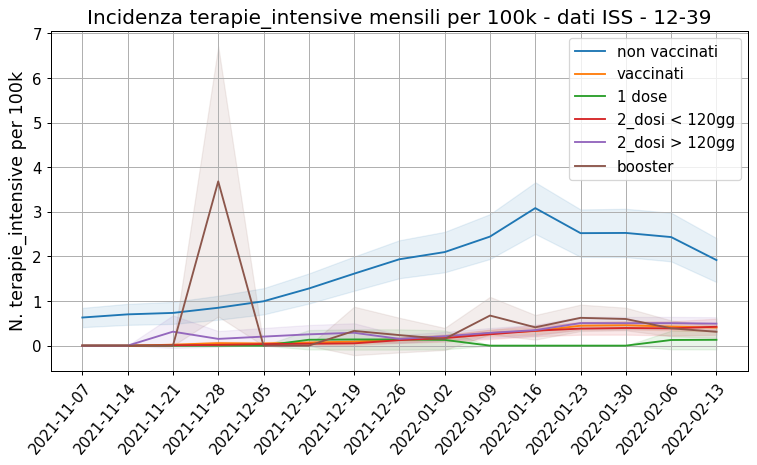

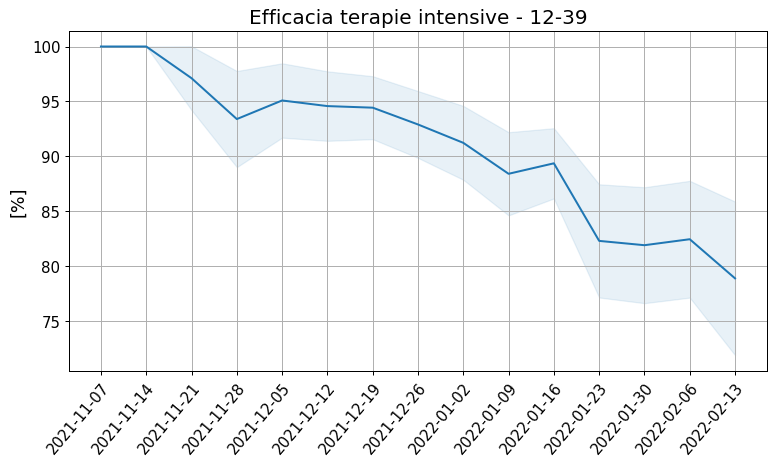

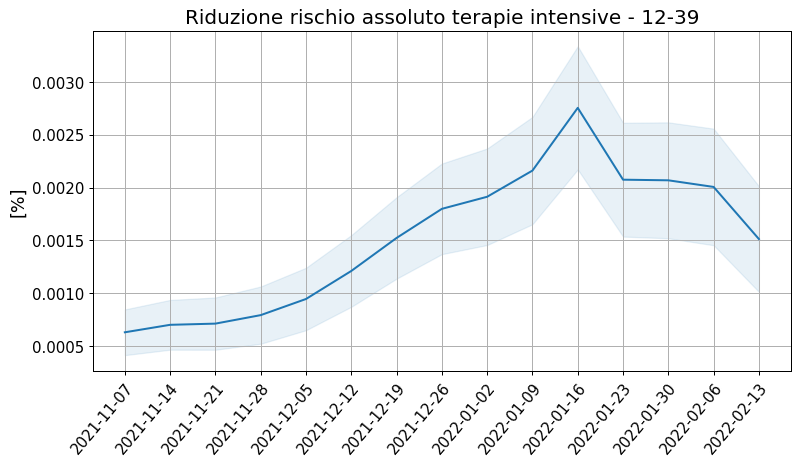

<Figure size 900x450 with 0 Axes>

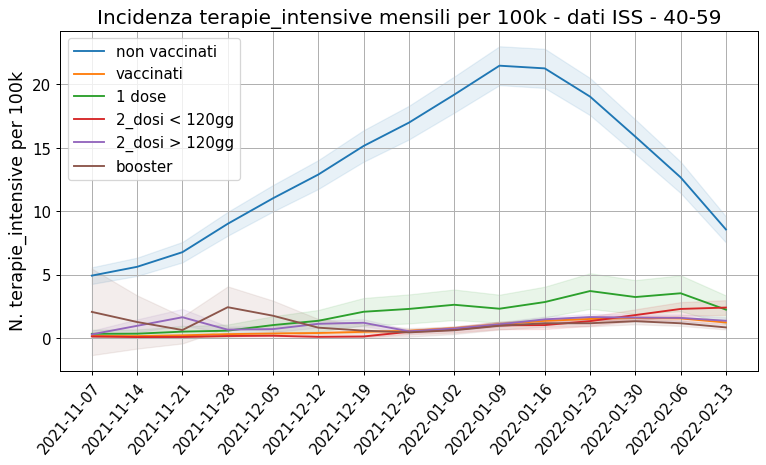

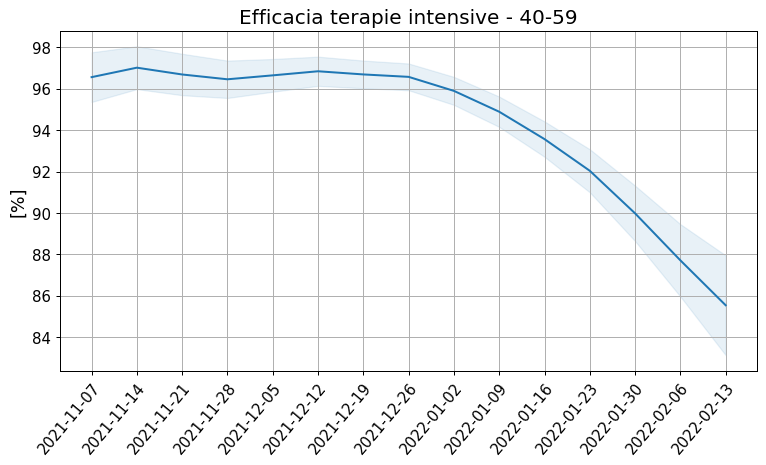

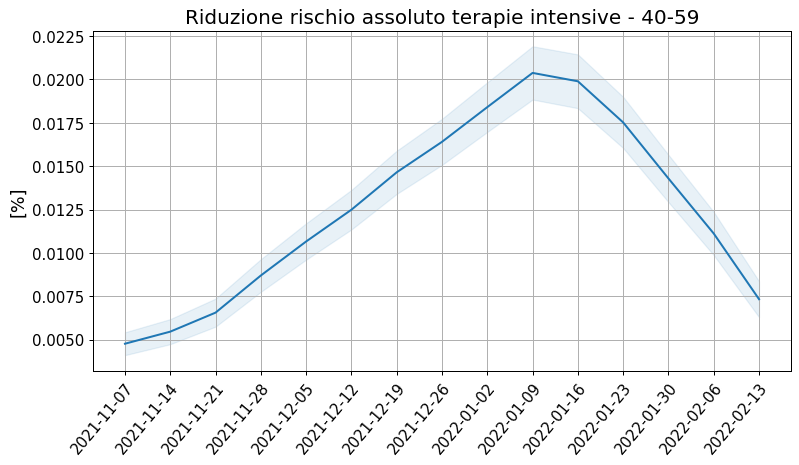

<Figure size 900x450 with 0 Axes>

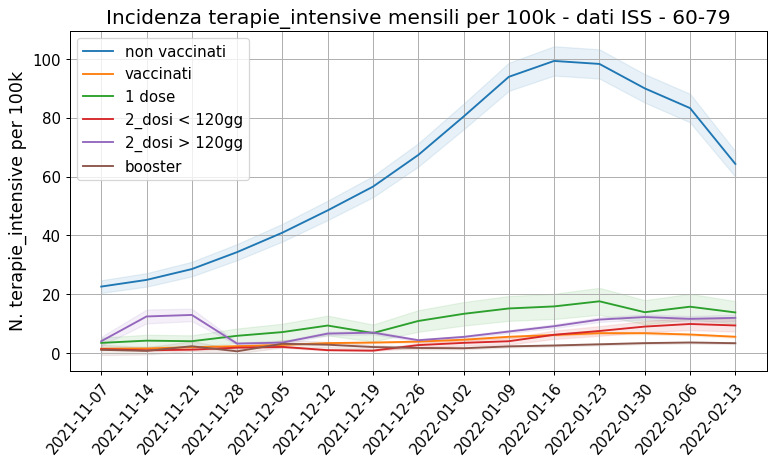

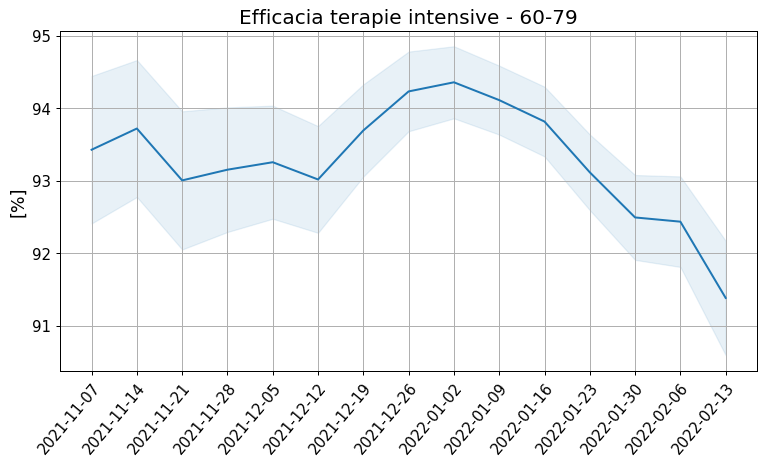

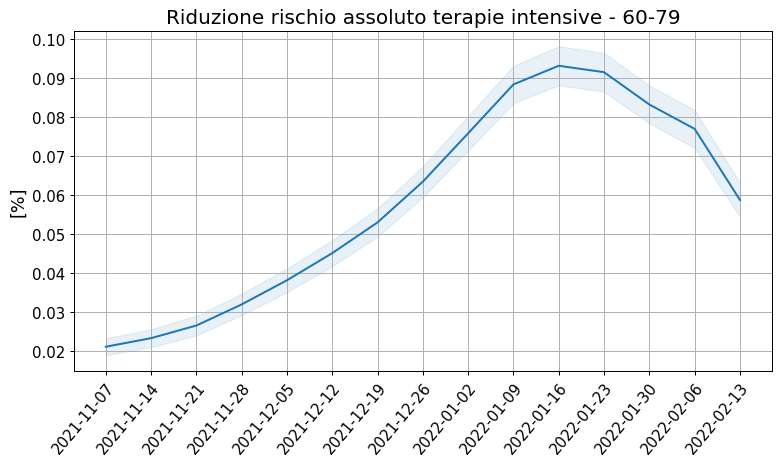

<Figure size 900x450 with 0 Axes>

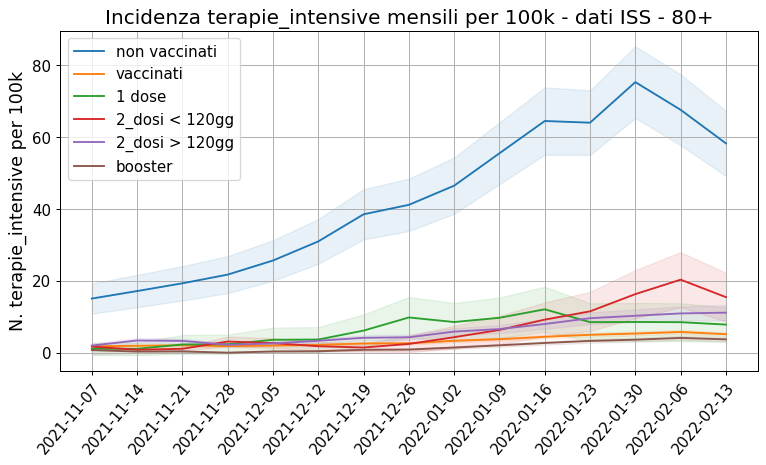

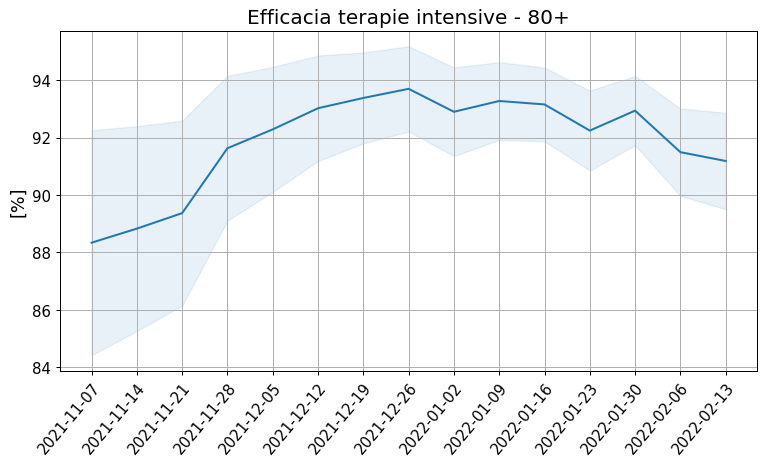

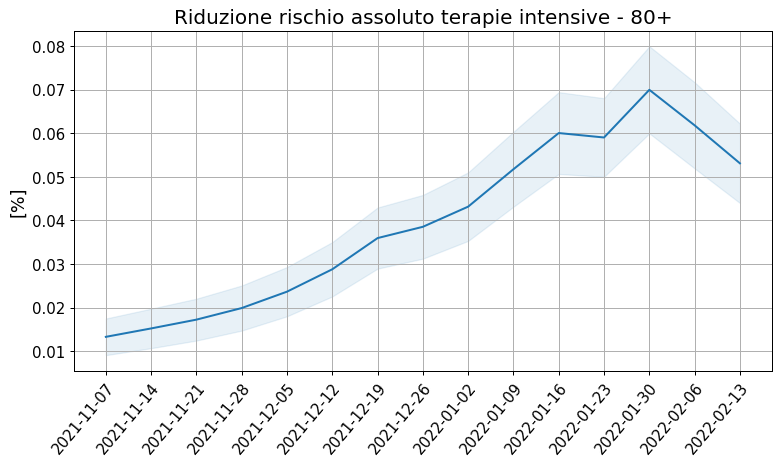

<Figure size 900x450 with 0 Axes>

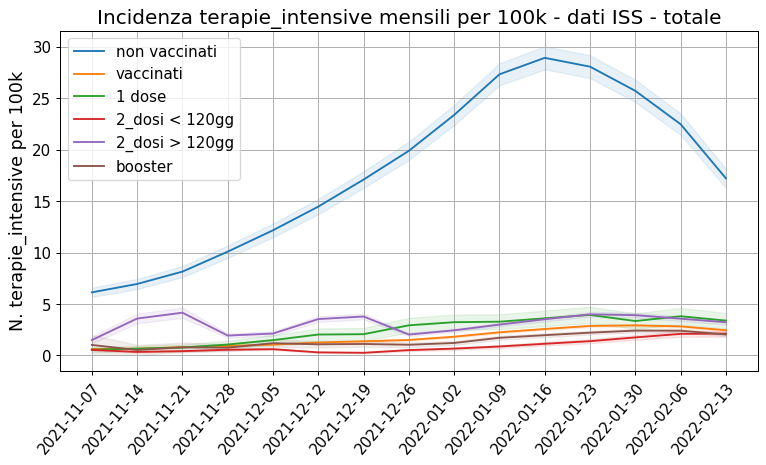

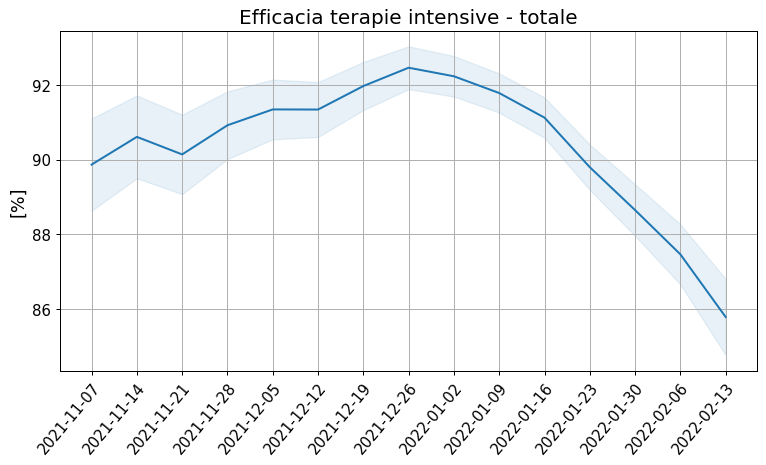

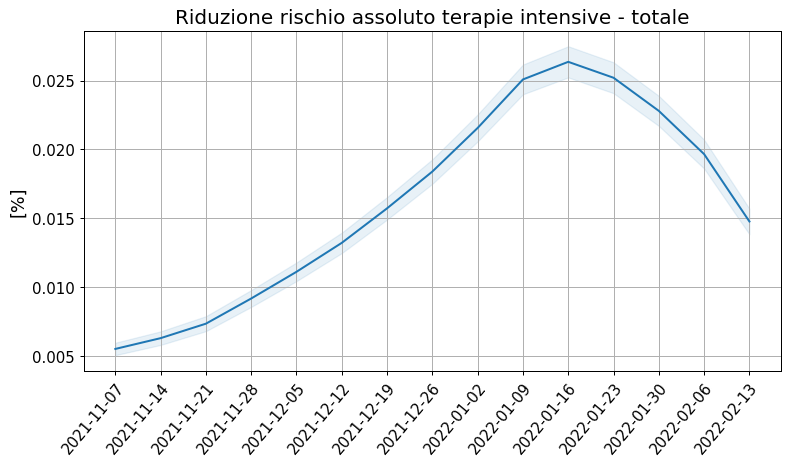

<Figure size 900x450 with 0 Axes>

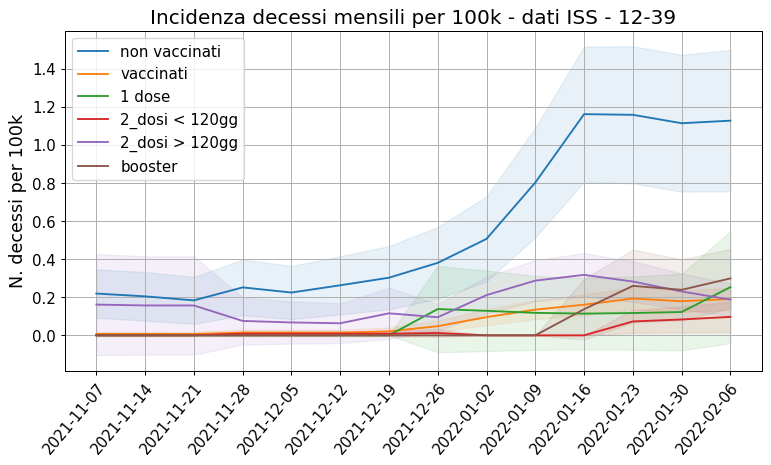

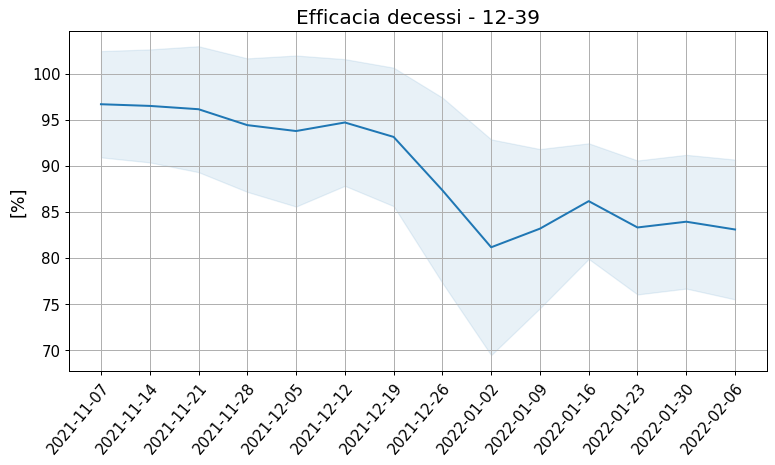

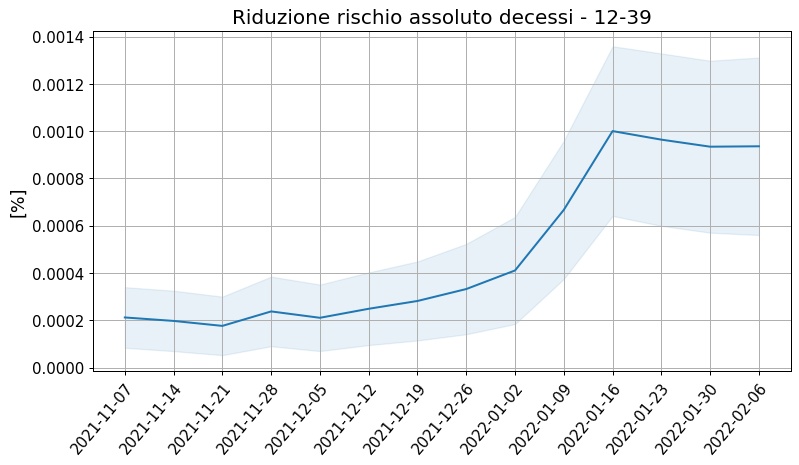

<Figure size 900x450 with 0 Axes>

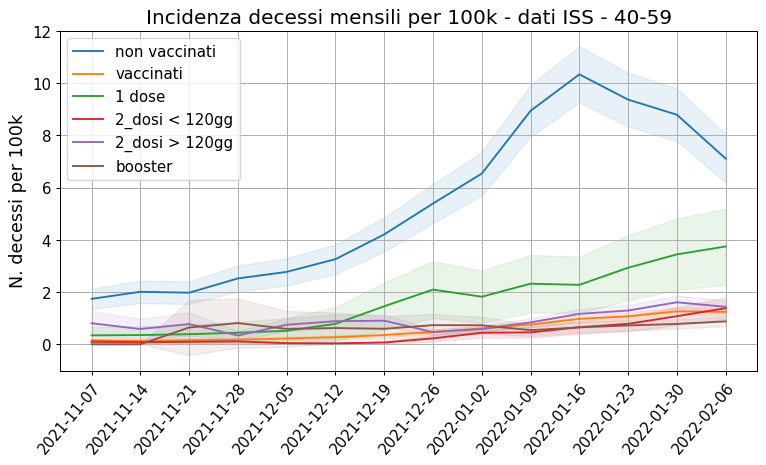

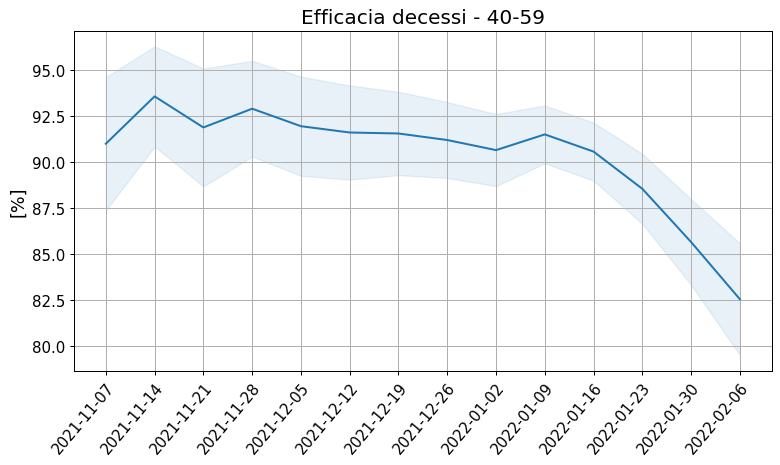

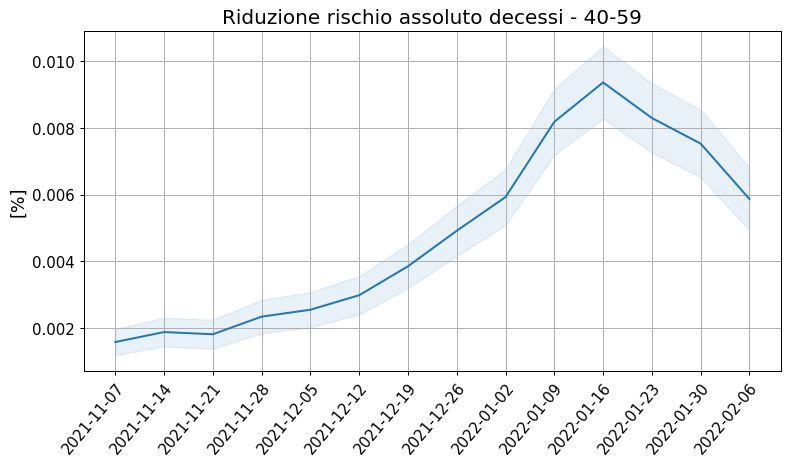

<Figure size 900x450 with 0 Axes>

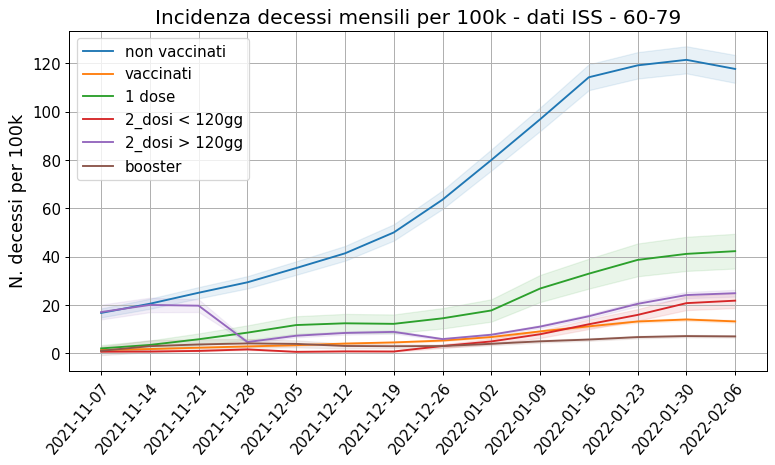

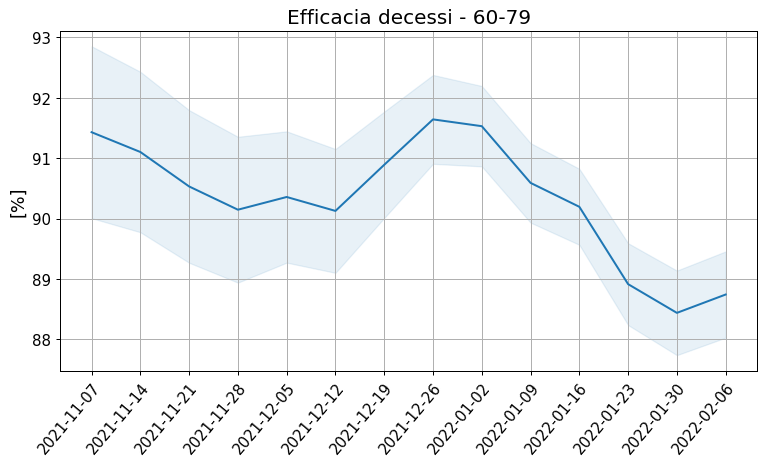

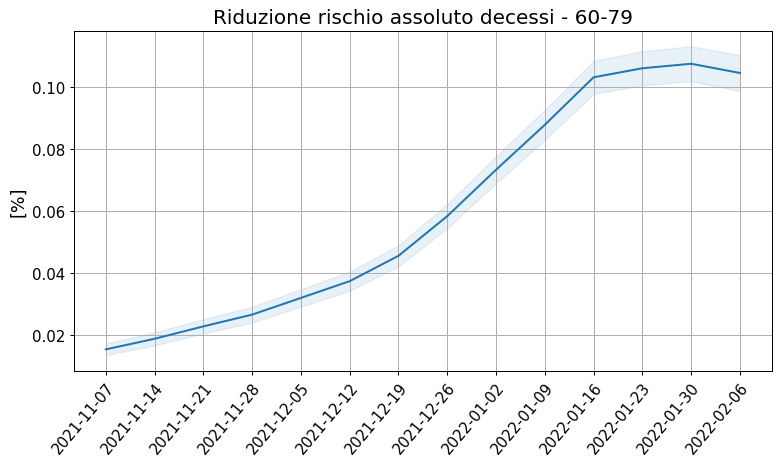

<Figure size 900x450 with 0 Axes>

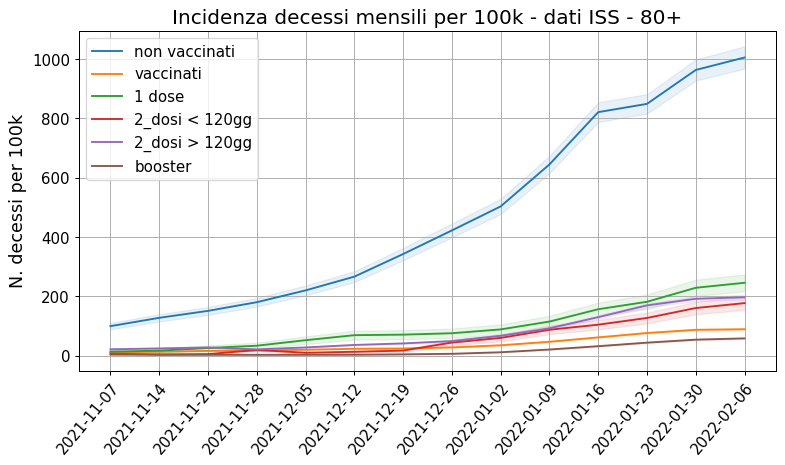

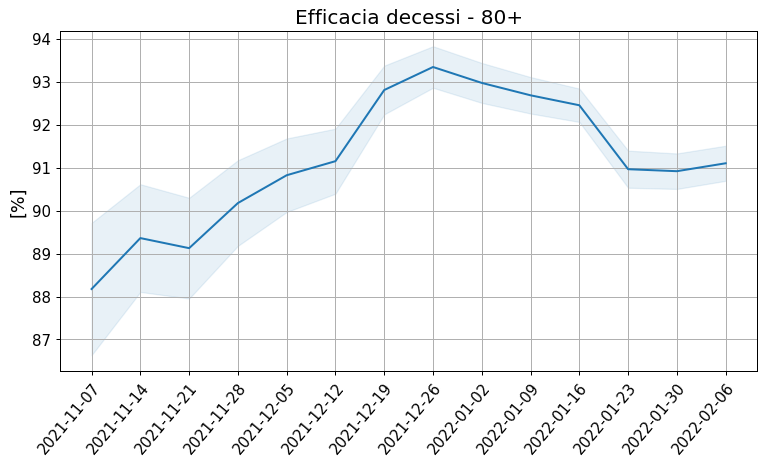

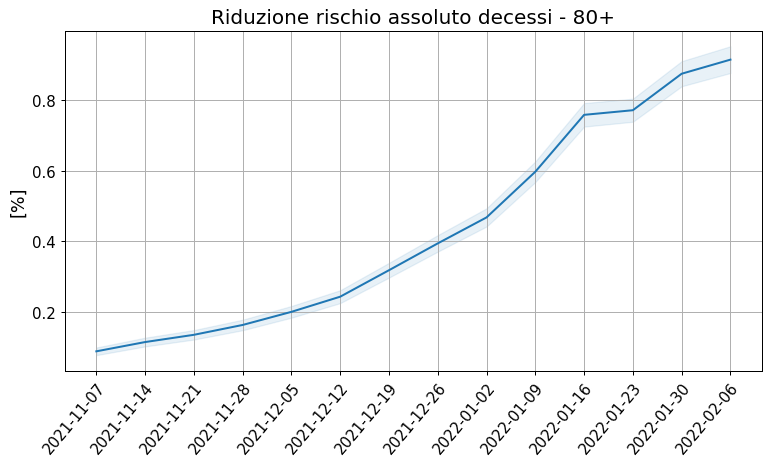

<Figure size 900x450 with 0 Axes>

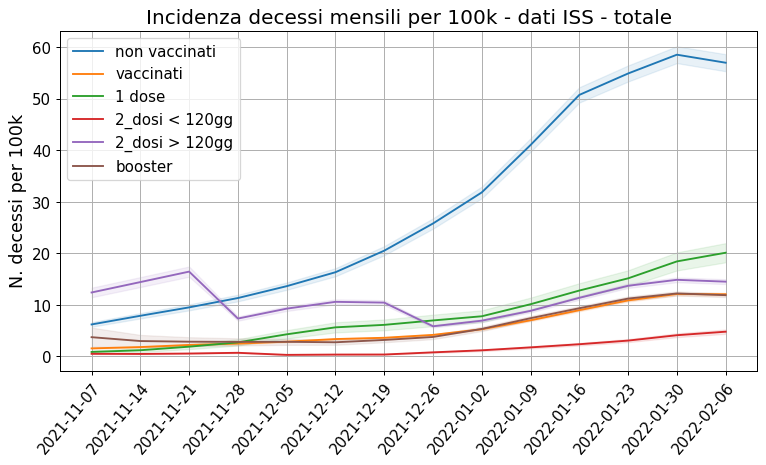

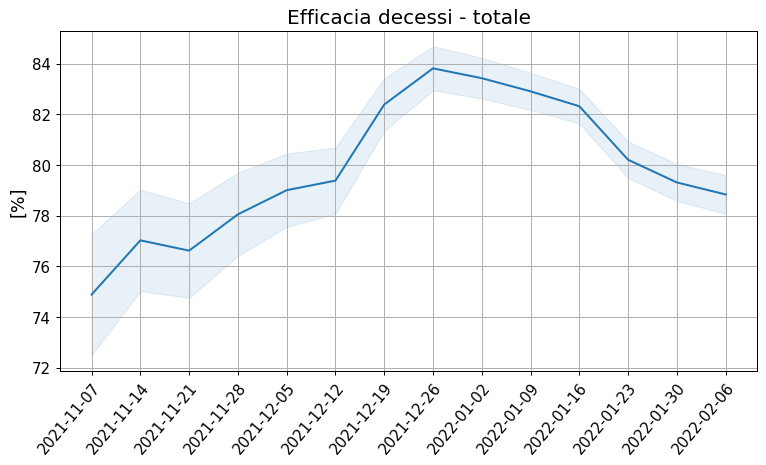

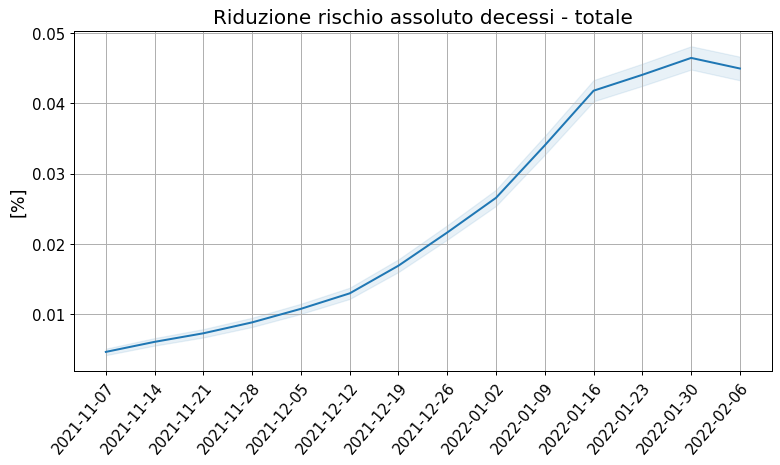

In [145]:
for s in ["contagi","ricoveri","terapie_intensive","decessi"]:
    for eta in df_iss.fascia_eta.unique():
        df_plt = df_iss[(df_iss.split==s) & (df_iss.fascia_eta==eta)]
        df_plt = df_plt.dropna()
        ynames = [f"{v}_100k" for v in ["vax", "no_vax"]]
        plt.figure(dpi=90, figsize=(10,5))
        createXYPlot(df_plt,
                     x="data",
                     y=["no_vax_100k",
                        "vax_100k",
                        "1_dose_100k",
                        "2_dosi_lt_cut_100k", 
                        "2_dosi_gt_cut_100k", 
                        "booster_100k"],
                     error=True,
                     alpha_err=0.1,
                     #colors=["r","g", colors[i]],
                     labels=["non vaccinati",
                             "vaccinati",
                             "1 dose",
                             "2_dosi < 120gg",
                             "2_dosi > 120gg",
                             "booster"],
                     plots_folder=plots_folder,
                     title=f"Incidenza {s} mensili per 100k - dati ISS - {eta}",
                     figsize_x=10,
                     figsize_y=5,
                     dpis=90,
                     linewidth=1.5,
                     ytitle=f"N. {s} per 100k",
                     savename=f"incidenza_{s}_{eta}_per_100k",
                     days_interval=1)
    
        createXYPlot(df_plt,
                     x="data",
                     y=["eff_vax"],
                     plots_folder=plots_folder,
                     title=f"Efficacia {s} - {eta}".replace("_"," "),
                     error=True,
                     figsize_x=10,
                     figsize_y=5,
                     dpis=90,
                     linewidth=1.6,
                     ytitle="[%]",
                     savename=f"efficacia_{s}_{eta}",
                     days_interval=1)
        
        createXYPlot(df_plt,
                     x="data",
                     y=["arr_vax"],
                     plots_folder=plots_folder,
                     title=f"Riduzione rischio assoluto {s} - {eta}".replace("_"," "),
                     error=True,
                     figsize_x=10,
                     figsize_y=5,
                     dpis=90,
                     linewidth=1.6,
                     ytitle="[%]",
                     savename=f"arr_{s}_{eta}",
                     days_interval=1)

In [146]:
def plot_vax_vs_no_vax(age: str, 
                       split: str):
    
    plt.figure(dpi=100, figsize=(10,5))
    df_plt = df_iss[(df_iss.fascia_eta==age) & (df_iss.split==split)].reset_index()
    title = f"{split}"
    if age != "totale":
        title += f" {age}"
    createXYPlot(df_plt,
                 y=["no_vax_frac"],
                 labels=["frazione non vaccinati"],
                 colors=["r"],
                 x="data",
                 plots_folder="./plots",
                 days_interval=1,
                 linewidth=1.8,
                 title=title.replace("_"," ")
                )

<Figure size 1000x500 with 0 Axes>

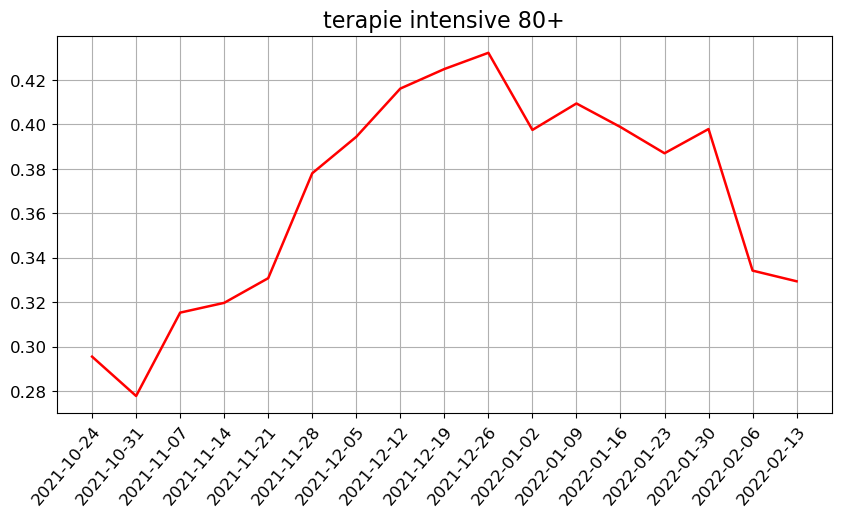

In [16]:
plot_vax_vs_no_vax("80+", "terapie_intensive")

In [17]:
df_iss["no_vax_frac_err"] = 1.645*np.sqrt((df_iss["no_vax_frac"]*df_iss["vax_frac"])/(df_iss["no_vax"] + df_iss["vax"]))
df_iss["no_vax_frac_err_lo"] = df_iss["no_vax_frac"] - df_iss["no_vax_frac_err"]
df_iss["no_vax_frac_err_hi"] = df_iss["no_vax_frac"] + df_iss["no_vax_frac_err"]

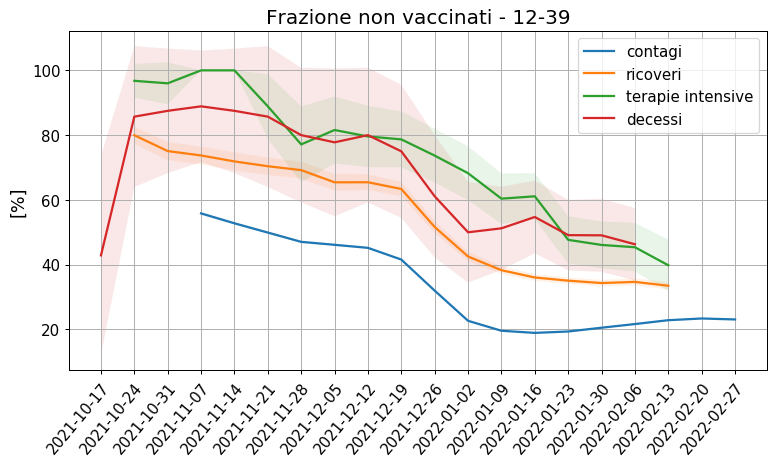

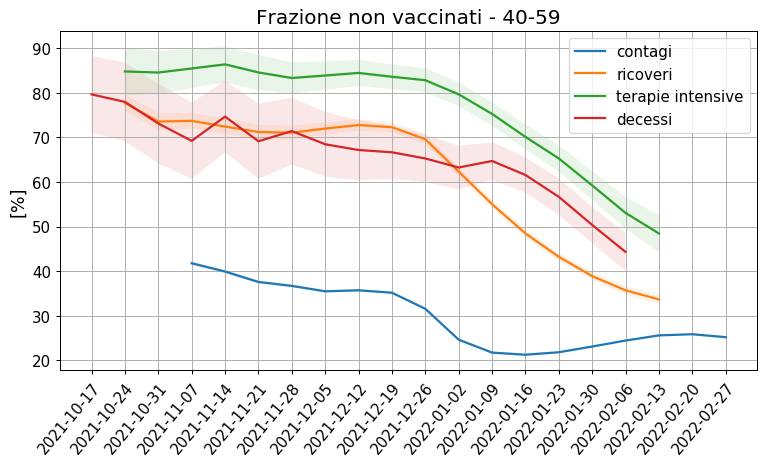

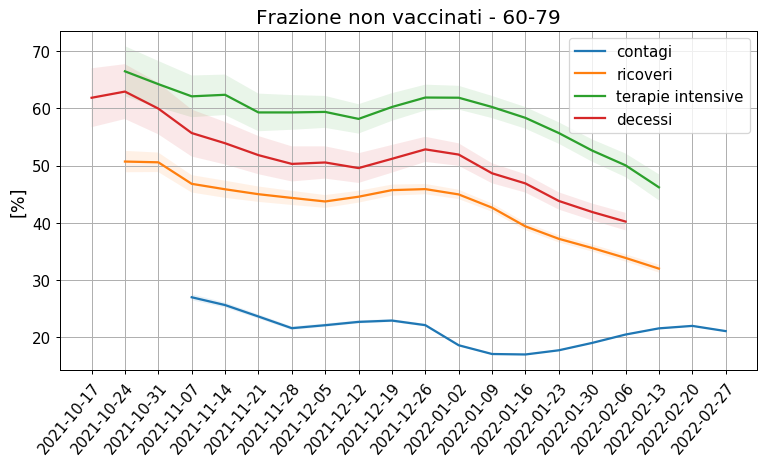

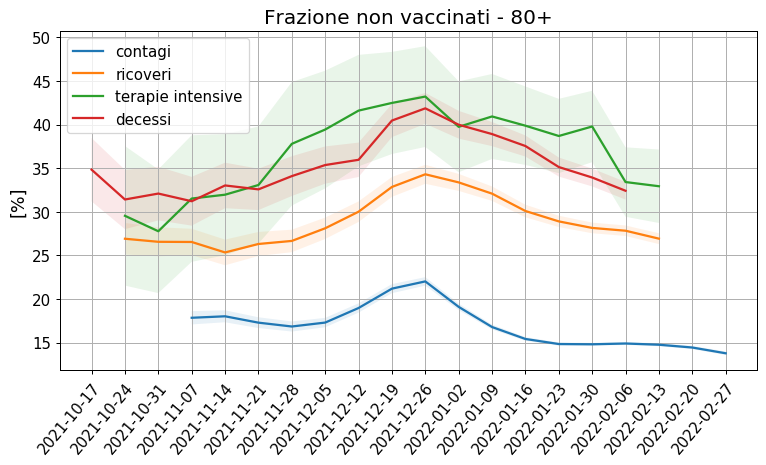

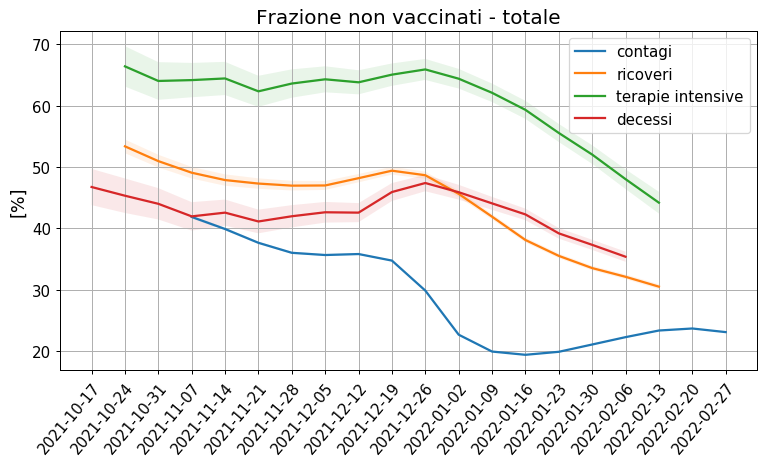

In [18]:
for age in sorted(age_values):
    plt.figure(dpi=90, figsize=(10,5))
    dates_str = []
    dates = []
    for split in ["contagi", "ricoveri", "terapie_intensive", "decessi"]:
        df_plt = df_iss[(df_iss.fascia_eta==age) & (df_iss.split==split)]
        dates_str += [x.strftime("%Y-%m-%d") for x in df_plt.data.unique()]
        dates += [x for x in df_plt.data.unique()]
        plt.plot(df_plt.data,
                 100*df_plt.no_vax_frac,
                 label=split.replace("_"," "),
                 linewidth=1.8
                )
        plt.fill_between(df_plt.data, 
                     100*df_plt.no_vax_frac_err_lo, 
                     100*df_plt.no_vax_frac_err_hi,
                     alpha=0.1
                    )
    title = f"Frazione non vaccinati - {age}"
    plt.title(title, fontsize=16)
    plt.legend(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel("[%]",fontsize=14)
    
    dates_str = sorted(list(set(dates_str)), reverse=False)
    dates = sorted(list(set(dates)), reverse=False)
    plt.xticks(dates,
               dates_str,
               fontsize=12,
               rotation=50, 
               rotation_mode="anchor", 
               verticalalignment = "top",
               horizontalalignment = "right")
    plt.savefig(f"{plots_folder}/frazione_no_vax_{age}",bbox_inches="tight")

In [19]:
def plot_var_ages(split, varname="vax"):
    plt.figure(dpi=90, figsize=(10,5))
    for age in sorted(age_values):
        df_plt = df_iss[(df_iss.fascia_eta==age) & (df_iss.split=="terapie_intensive")]
        plt.plot(df_plt.data,
            df_plt[varname],
            label=age,
            linewidth=1.8)
    title = f"Totale {varname} {split}".replace("_", " ")
    plt.title(title, fontsize=16)
    plt.grid()
    plt.legend(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(df_plt.data,
               fontsize=12,
               rotation=50, 
               rotation_mode="anchor", 
               verticalalignment = "top",
               horizontalalignment = "right"
              )

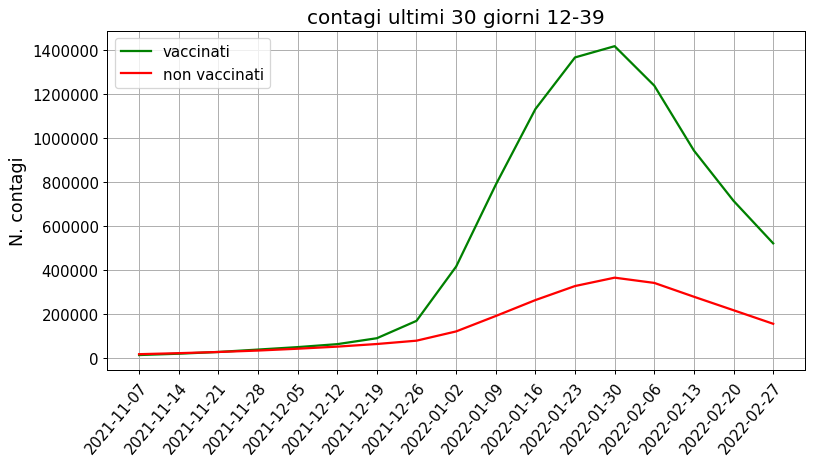

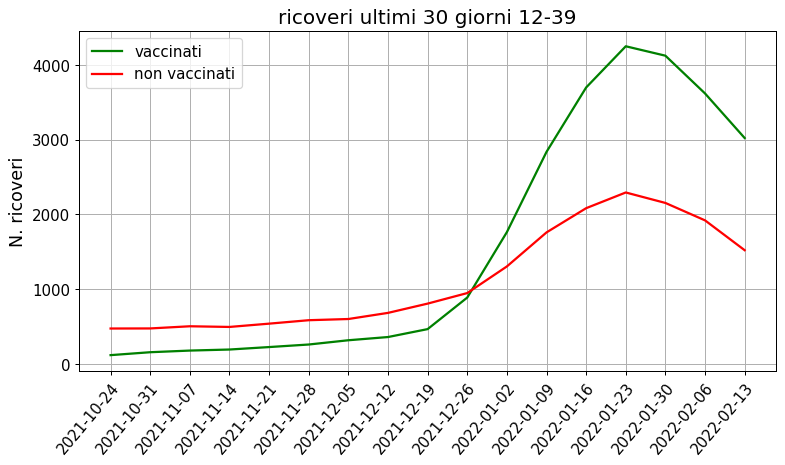

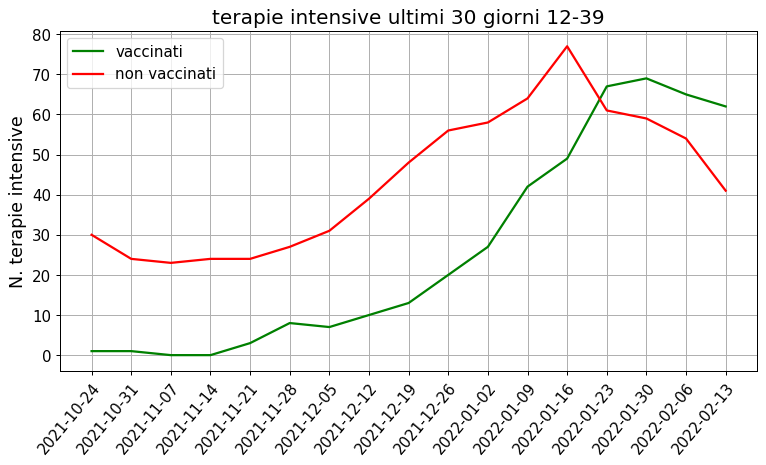

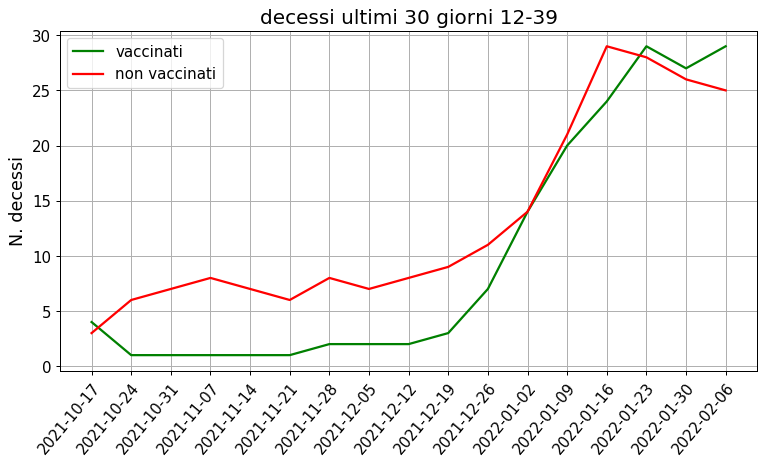

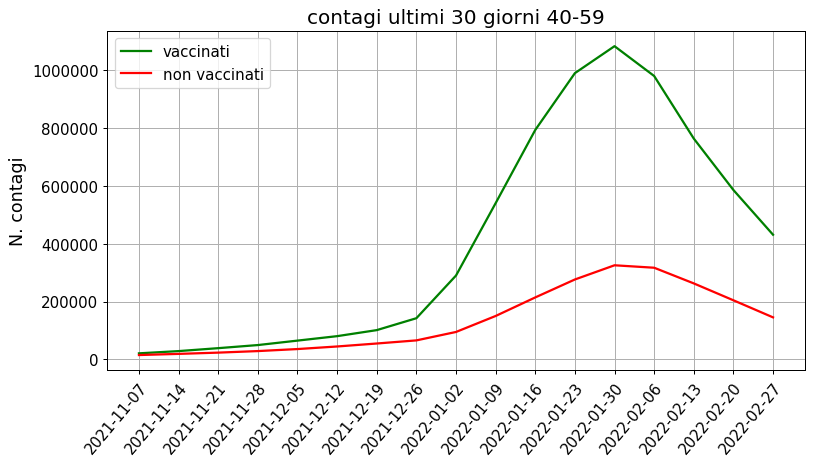

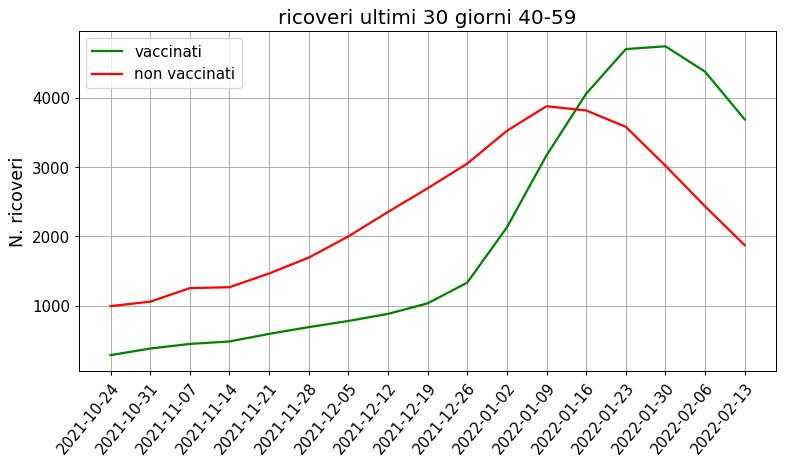

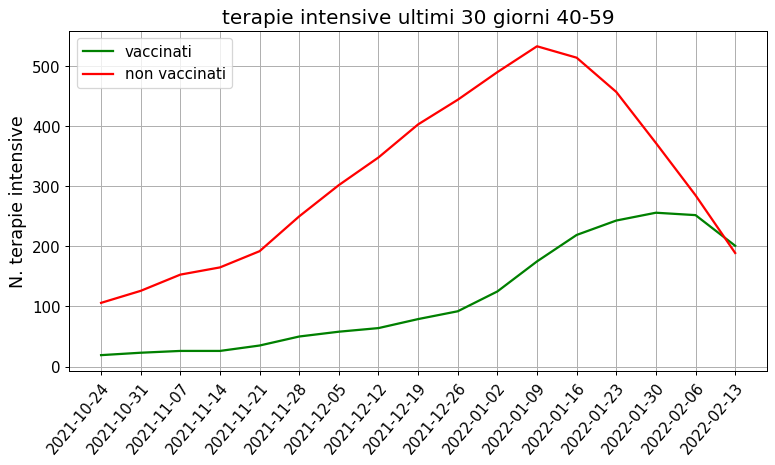

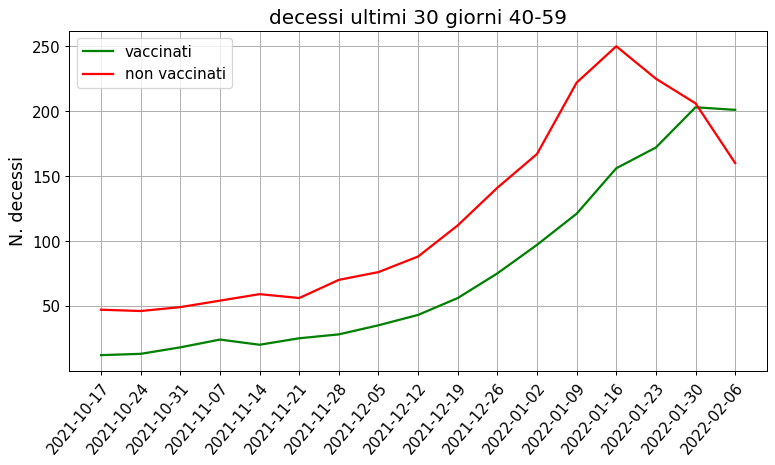

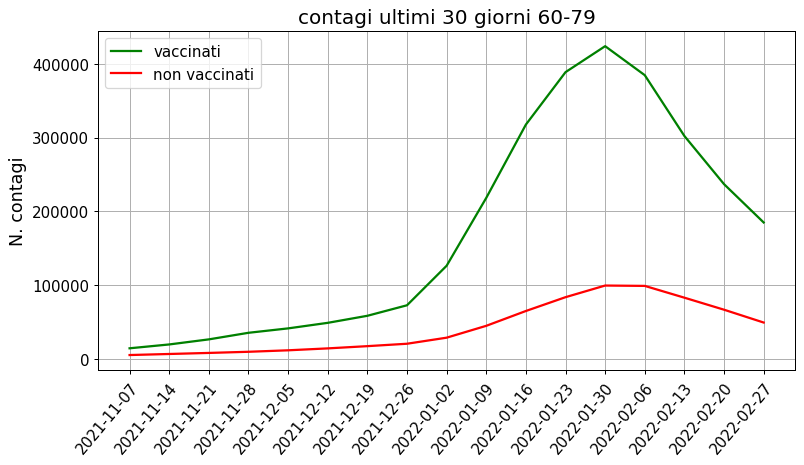

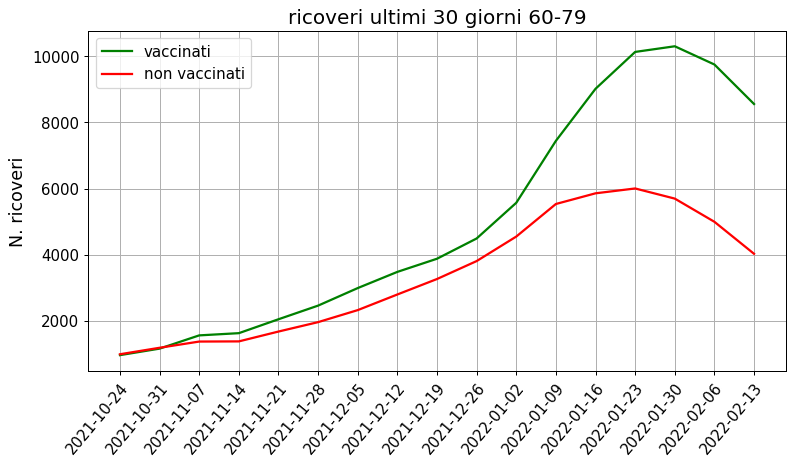

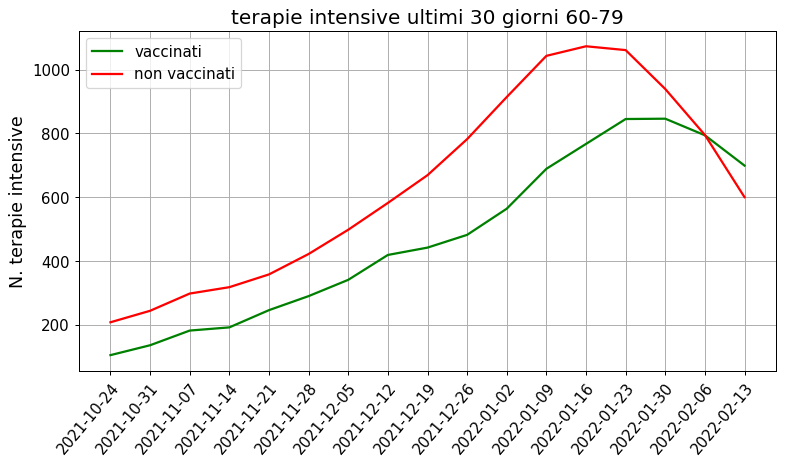

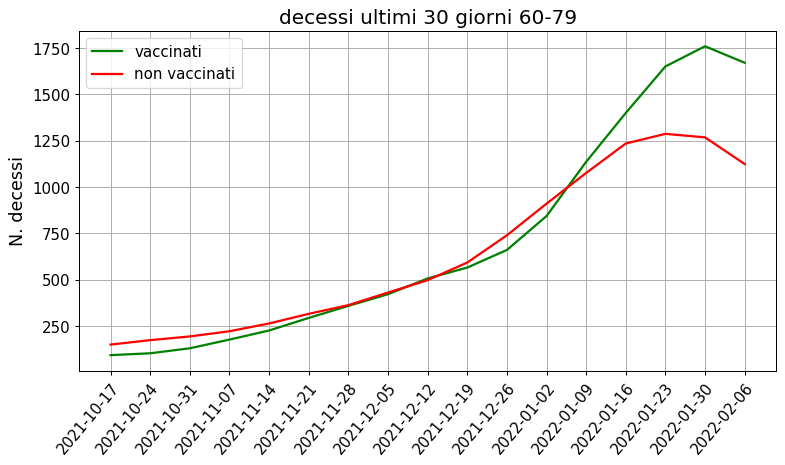

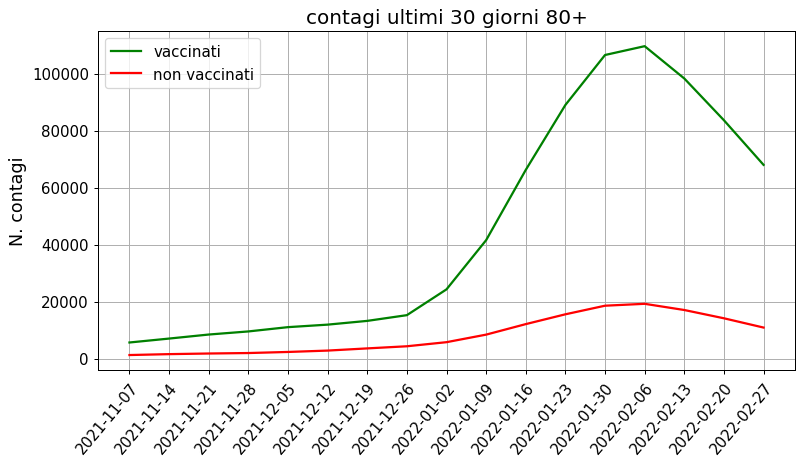

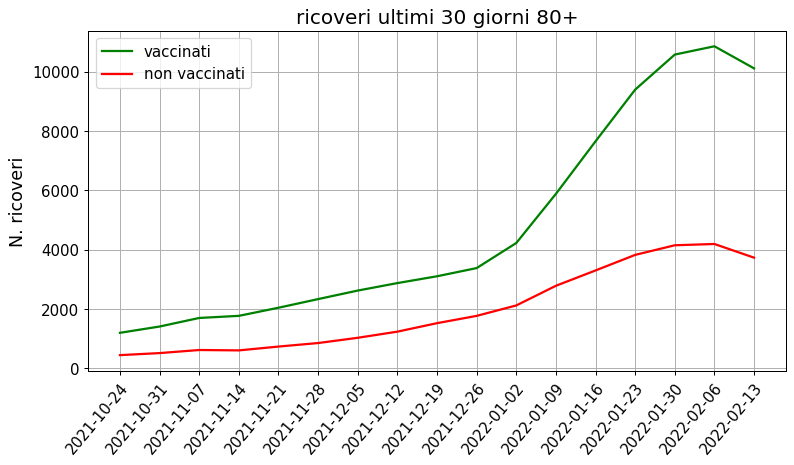

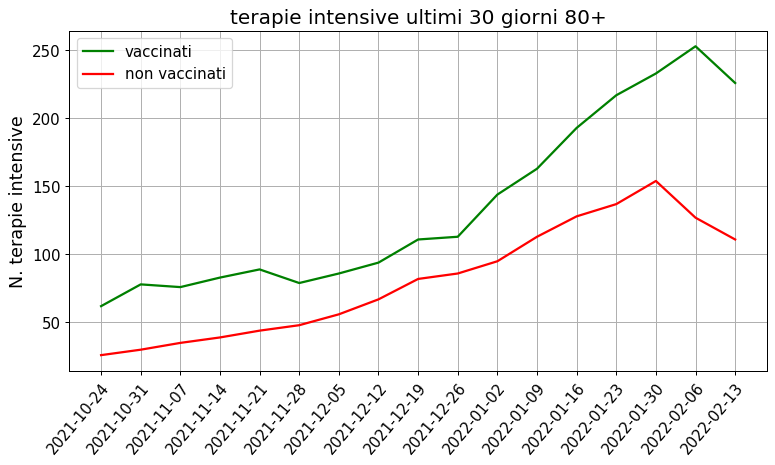

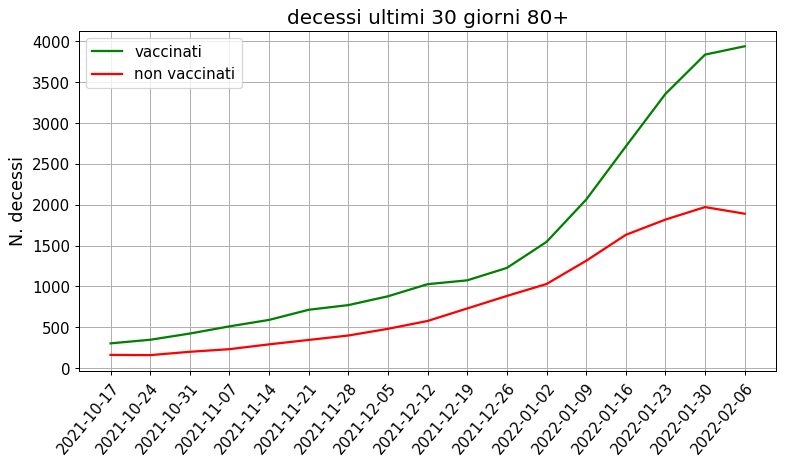

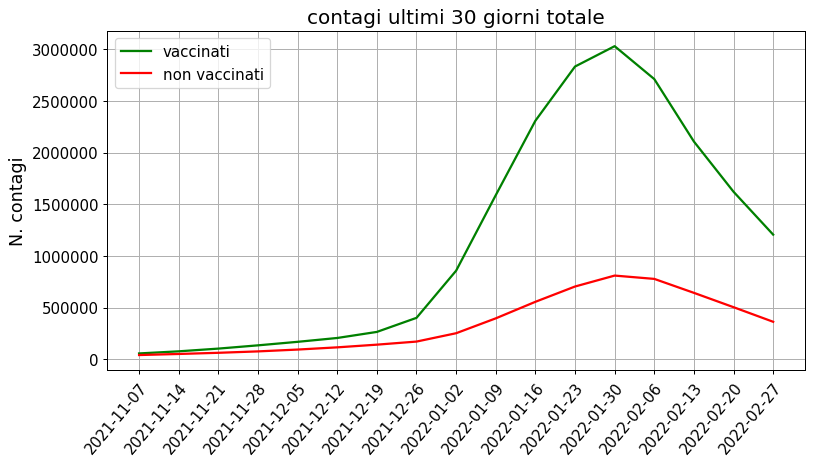

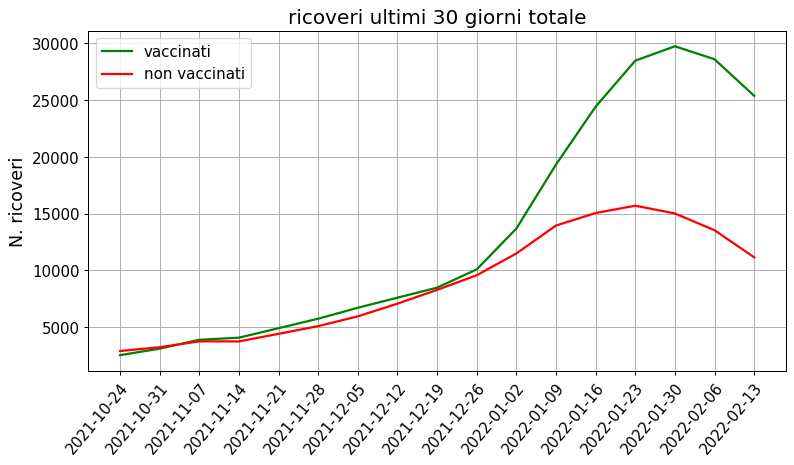

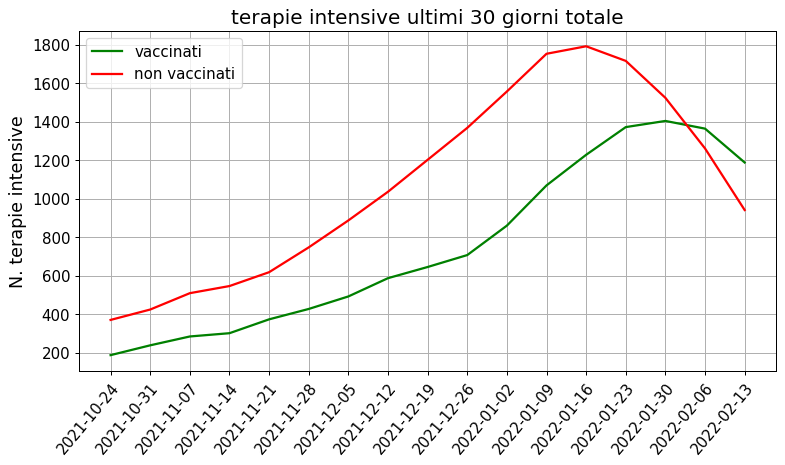

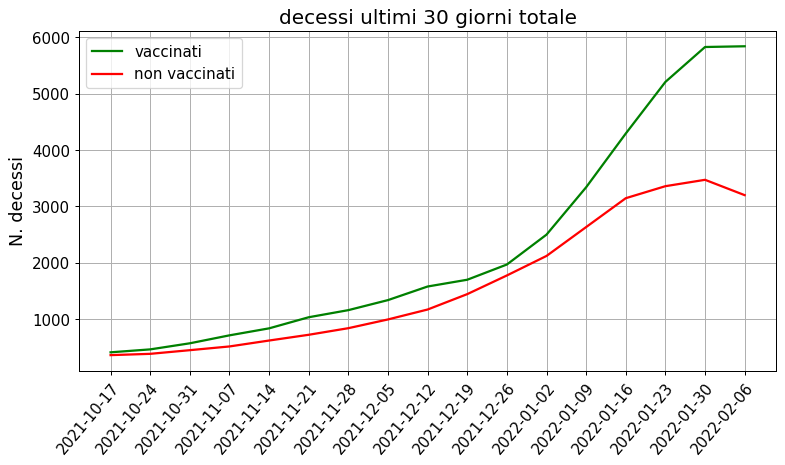

In [20]:
for age in age_values:
    for split in splits:
        df_plt = df_plt = df_iss[(df_iss.fascia_eta==age) & (df_iss.split==split)]
        savename = f"{split}_{age}"
        yvars = ["vax", "no_vax"]
        savename += "_" + "_".join(yvars)
        createXYPlot(df_plt,
                     y=yvars,
                     x="data",
                     labels=["vaccinati", "non vaccinati"],
                     colors=["g","r"],
                     plots_folder=plots_folder,
                     linewidth=1.8,
                     days_interval=1,
                     title=f"{split} ultimi 30 giorni {age}".replace("_"," "),
                     savename=savename,
                     ytitle=f"N. {split}".replace("_"," "),
                     figsize_x=10,
                     figsize_y=5,
                     dpis=90
                    )

In [190]:
def get_lethality(df: pd.DataFrame, 
                  age: str,
                  savename: str,
                  title: str,
                  yscale: str ="linear",
                  num_den: tuple = ("decessi","contagi"),
                 ):
    
    df_let = df_iss[df_iss.fascia_eta==age]
    value_cols = ["vax",
                  "no_vax",
                  "1_dose",
                  "2_dosi_lt_cut",
                  "2_dosi_gt_cut",
                  "booster",
                 ]
    df_pivot = df_let.pivot(index='data', columns=["split"], values=value_cols)
    cols = []
    for i in range(0,len(df_pivot.columns)):
        cols.append(df_pivot.columns.get_level_values(1)[i] + '_' + df_pivot.columns.get_level_values(0)[i])
    df_pivot.columns = cols
    
    for v in value_cols:
        df_pivot[f"letalita_{v}"] = df_pivot[f"{num_den[0]}_{v}"]/df_pivot[f"{num_den[1]}_{v}"]
        df_pivot[f"sd_letalita_{v}"] = np.sqrt(df_pivot[f"letalita_{v}"] * (1 - df_pivot[f"letalita_{v}"]) / df_pivot[f"contagi_{v}"])
        df_pivot[f"lo_err_letalita_{v}"] = df_pivot[f"letalita_{v}"] - 1.645 * df_pivot[f"sd_letalita_{v}"]
        df_pivot[f"hi_err_letalita_{v}"] = df_pivot[f"letalita_{v}"] + 1.645 * df_pivot[f"sd_letalita_{v}"]
        df_pivot[f"lo_err_letalita_{v}"] = df_pivot[f"lo_err_letalita_{v}"].apply(lambda x: 0 if x < 0 else x)
    
    dates = df_pivot[[f"{num_den[0]}_no_vax",f"{num_den[1]}_no_vax"]].dropna().index
    if age == "totale":
        display(df_pivot[["contagi_no_vax", 
                          "ricoveri_no_vax", 
                          "letalita_no_vax",
                          "contagi_booster", 
                          "ricoveri_booster",
                          "letalita_booster"
                         ]])
        
    plt.figure(figsize=(10,5),dpi=90)
    var_dict = {"no_vax":"non vaccinati", 
                "vax":"vaccinati",
                "1_dose":"1 dose", 
                "2_dosi_lt_cut": "2 dosi < 120gg",
                "2_dosi_gt_cut": "2 dosi > 120gg",
                "booster": "booster"}
    for y in var_dict.keys():
        
        plt.plot(df_pivot.index, 
                 100*df_pivot[f"letalita_{y}"],
                 label=var_dict[y],
                 linewidth=1.8
                )
        plt.fill_between(df_pivot.index, 
                     100*df_pivot[f"lo_err_letalita_{y}"], 
                     100*df_pivot[f"hi_err_letalita_{y}"],
                     alpha=0.1
                    )
    plt.legend(fontsize=12)
    plt.title(f"{title} {age} - dati ISS",fontsize=17)
    plt.ylabel(f"{num_den[0]} / {num_den[1]} [%]".replace("_"," "),fontsize=14)
    _ = plt.yticks(fontsize=13)
    _ = plt.xticks(dates,
                   fontsize=13,
                   rotation=50, 
                   rotation_mode="anchor", 
                   verticalalignment = "top",
                   horizontalalignment = "right"
                  )
    plt.yscale(yscale)
    plt.savefig(f"{plots_folder}/{savename}.png", bbox_inches="tight")
    return df_pivot

contagi_no_vax  ricoveri_no_vax  letalita_no_vax  contagi_booster  \
data                                                                            
2021-10-17             NaN              NaN              NaN              NaN   
2021-10-24             NaN           2890.0              NaN              NaN   
2021-10-31             NaN           3220.0              NaN              NaN   
2021-11-07         40182.0           3737.0         0.012817            286.0   
2021-11-14         50564.0           3733.0         0.012262            537.0   
2021-11-21         61908.0           4402.0         0.011662            969.0   
2021-11-28         75512.0           5081.0         0.011111           1710.0   
2021-12-05         93220.0           5944.0         0.010663           2652.0   
2021-12-12        114674.0           7059.0         0.010203           4219.0   
2021-12-19        140677.0           8278.0         0.010258           7655.0   
2021-12-26        170551.0           9564.0         0.010402          20375.0   
2022-01-02        251412.0          11487.0         0.008432          79260.0   
2022-01-09        395424.0          13946.0         0.006656         200146.0   
2022-01-16        555697.0          15049.0         0.005658         358530.0   
2022-01-23        703732.0          15695.0         0.004770         521657.0   
2022-01-30        809625.0          15012.0         0.004286         672910.0   
2022-02-06        777547.0          13534.0         0.004113         738378.0   
2022-02-13        642419.0          11144.0              NaN         717143.0   
2022-02-20        503511.0              NaN              NaN         682585.0   
2022-02-27        362240.0              NaN              NaN         617287.0   

            ricoveri_booster  letalita_booster  
data                                            
2021-10-17               NaN               NaN  
2021-10-24              17.0               NaN  
2021-10-31              35.0               NaN  
2021-11-07              69.0          0.038462  
2021-11-14              74.0          0.031657  
2021-11-21             121.0          0.029928  
2021-11-28             176.0          0.026316  
2021-12-05             272.0          0.023379  
2021-12-12             368.0          0.019910  
2021-12-19             546.0          0.017244  
2021-12-26             955.0          0.010552  
2022-01-02            2066.0          0.005450  
2022-01-09            4177.0          0.004067  
2022-01-16            6606.0          0.003712  
2022-01-23            9017.0          0.003677  
2022-01-30           11075.0          0.003571  
2022-02-06           12271.0          0.003626  
2022-02-13           12272.0               NaN  
2022-02-20               NaN               NaN  
2022-02-27               NaN               NaN

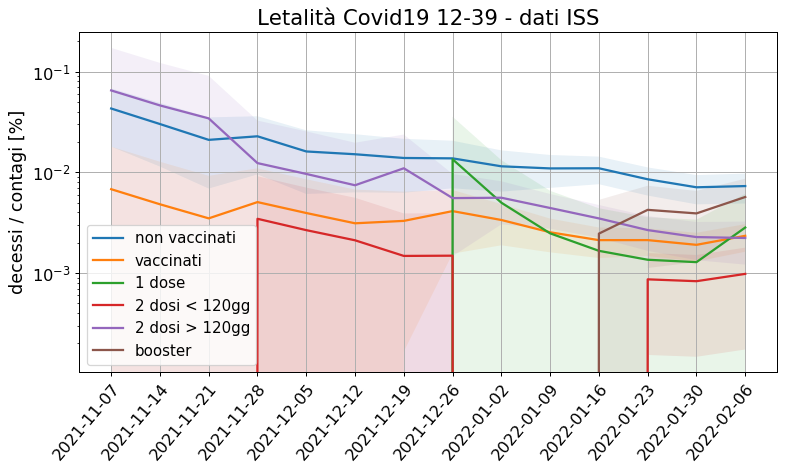

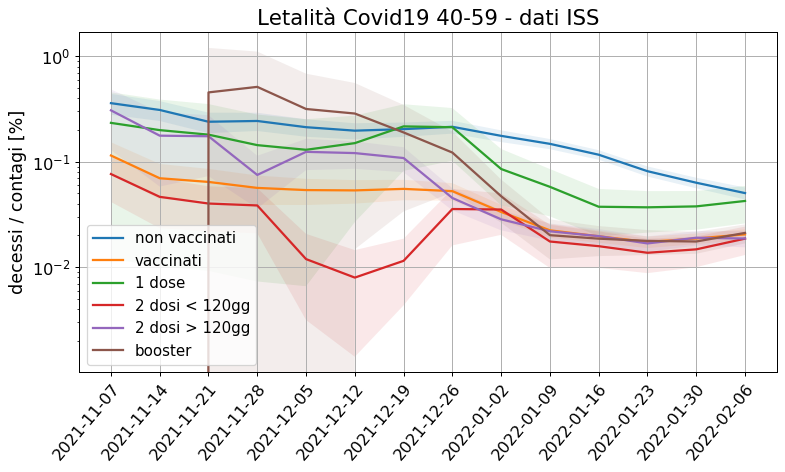

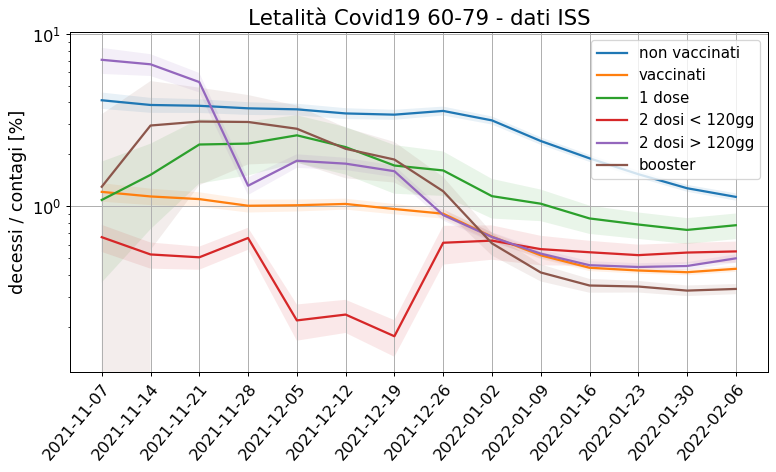

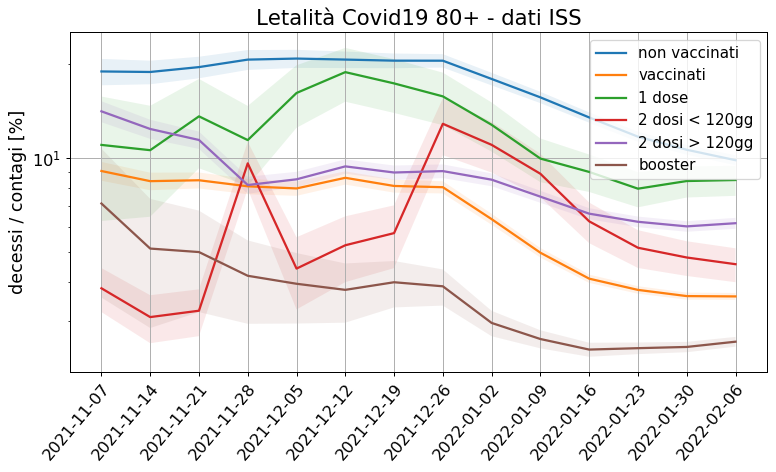

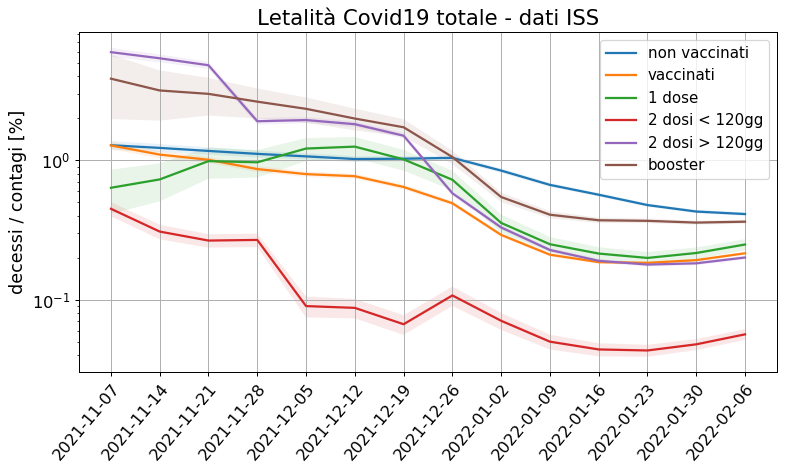

In [199]:
for age in age_values:
    get_lethality(df_let,
                  age=age,
                  savename=f"letalita_iss_{age}",
                  title="Letalità Covid19",
                  yscale="log"
                 )

contagi_no_vax  ricoveri_no_vax  letalita_no_vax  contagi_booster  \
data                                                                            
2021-10-17             NaN              NaN              NaN              NaN   
2021-10-24             NaN           2890.0              NaN              NaN   
2021-10-31             NaN           3220.0              NaN              NaN   
2021-11-07         40182.0           3737.0         0.093002            286.0   
2021-11-14         50564.0           3733.0         0.073827            537.0   
2021-11-21         61908.0           4402.0         0.071106            969.0   
2021-11-28         75512.0           5081.0         0.067287           1710.0   
2021-12-05         93220.0           5944.0         0.063763           2652.0   
2021-12-12        114674.0           7059.0         0.061557           4219.0   
2021-12-19        140677.0           8278.0         0.058844           7655.0   
2021-12-26        170551.0           9564.0         0.056077          20375.0   
2022-01-02        251412.0          11487.0         0.045690          79260.0   
2022-01-09        395424.0          13946.0         0.035268         200146.0   
2022-01-16        555697.0          15049.0         0.027081         358530.0   
2022-01-23        703732.0          15695.0         0.022303         521657.0   
2022-01-30        809625.0          15012.0         0.018542         672910.0   
2022-02-06        777547.0          13534.0         0.017406         738378.0   
2022-02-13        642419.0          11144.0         0.017347         717143.0   
2022-02-20        503511.0              NaN              NaN         682585.0   
2022-02-27        362240.0              NaN              NaN         617287.0   

            ricoveri_booster  letalita_booster  
data                                            
2021-10-17               NaN               NaN  
2021-10-24              17.0               NaN  
2021-10-31              35.0               NaN  
2021-11-07              69.0          0.241259  
2021-11-14              74.0          0.137803  
2021-11-21             121.0          0.124871  
2021-11-28             176.0          0.102924  
2021-12-05             272.0          0.102564  
2021-12-12             368.0          0.087224  
2021-12-19             546.0          0.071326  
2021-12-26             955.0          0.046871  
2022-01-02            2066.0          0.026066  
2022-01-09            4177.0          0.020870  
2022-01-16            6606.0          0.018425  
2022-01-23            9017.0          0.017285  
2022-01-30           11075.0          0.016458  
2022-02-06           12271.0          0.016619  
2022-02-13           12272.0          0.017112  
2022-02-20               NaN               NaN  
2022-02-27               NaN               NaN

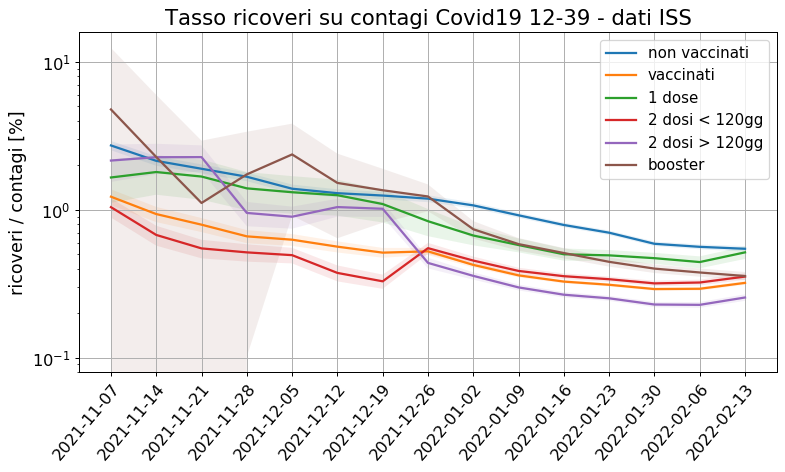

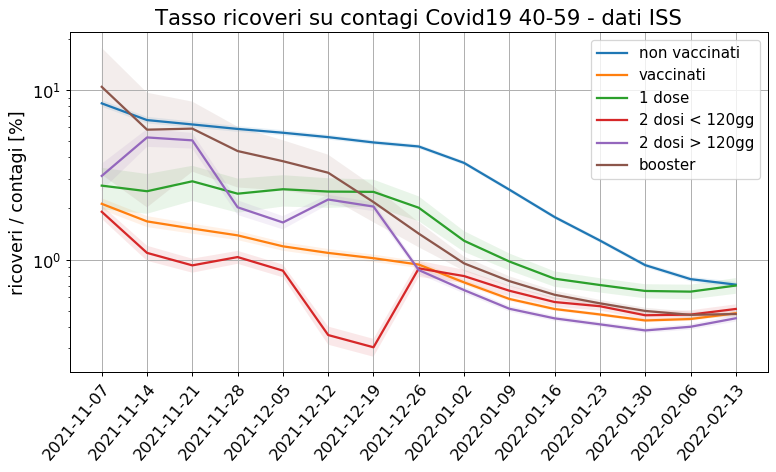

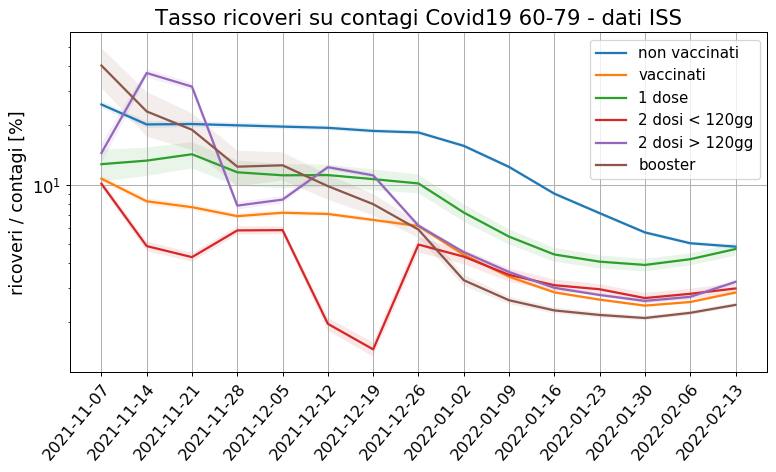

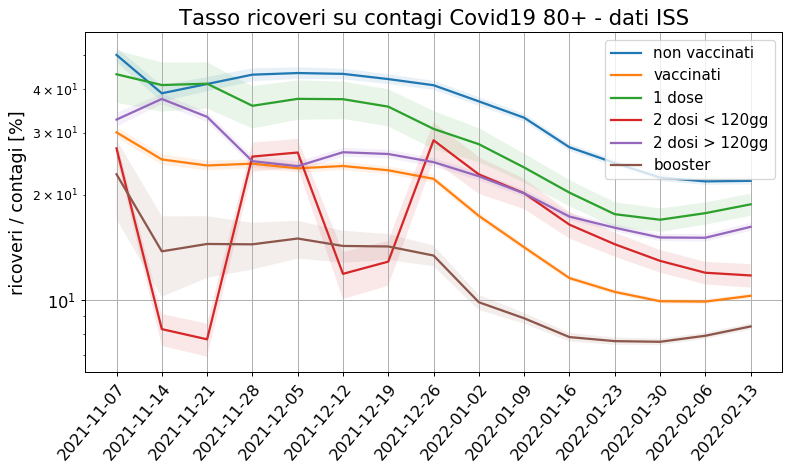

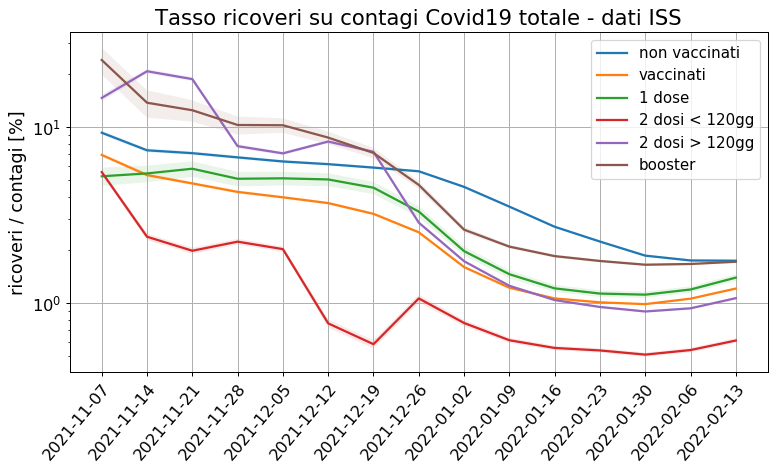

In [201]:
for age in age_values:
    df_let = df_iss[df_iss.fascia_eta==age]
    get_lethality(df_let,
                  age=age,
                  savename=f"ricoveri_contagi_iss_{age}",
                  title="Tasso ricoveri su contagi Covid19",
                  yscale="log",
                  num_den=("ricoveri","contagi")
                 )

contagi_no_vax  ricoveri_no_vax  letalita_no_vax  contagi_booster  \
data                                                                            
2021-10-17             NaN              NaN              NaN              NaN   
2021-10-24             NaN           2890.0              NaN              NaN   
2021-10-31             NaN           3220.0              NaN              NaN   
2021-11-07         40182.0           3737.0         0.012667            286.0   
2021-11-14         50564.0           3733.0         0.010798            537.0   
2021-11-21         61908.0           4402.0         0.009983            969.0   
2021-11-28         75512.0           5081.0         0.009892           1710.0   
2021-12-05         93220.0           5944.0         0.009515           2652.0   
2021-12-12        114674.0           7059.0         0.009034           4219.0   
2021-12-19        140677.0           8278.0         0.008544           7655.0   
2021-12-26        170551.0           9564.0         0.008021          20375.0   
2022-01-02        251412.0          11487.0         0.006193          79260.0   
2022-01-09        395424.0          13946.0         0.004433         200146.0   
2022-01-16        555697.0          15049.0         0.003225         358530.0   
2022-01-23        703732.0          15695.0         0.002438         521657.0   
2022-01-30        809625.0          15012.0         0.001882         672910.0   
2022-02-06        777547.0          13534.0         0.001622         738378.0   
2022-02-13        642419.0          11144.0         0.001465         717143.0   
2022-02-20        503511.0              NaN              NaN         682585.0   
2022-02-27        362240.0              NaN              NaN         617287.0   

            ricoveri_booster  letalita_booster  
data                                            
2021-10-17               NaN               NaN  
2021-10-24              17.0               NaN  
2021-10-31              35.0               NaN  
2021-11-07              69.0          0.010490  
2021-11-14              74.0          0.005587  
2021-11-21             121.0          0.008256  
2021-11-28             176.0          0.007018  
2021-12-05             272.0          0.009804  
2021-12-12             368.0          0.007822  
2021-12-19             546.0          0.006009  
2021-12-26             955.0          0.002896  
2022-01-02            2066.0          0.001236  
2022-01-09            4177.0          0.000939  
2022-01-16            6606.0          0.000781  
2022-01-23            9017.0          0.000725  
2022-01-30           11075.0          0.000704  
2022-02-06           12271.0          0.000731  
2022-02-13           12272.0          0.000743  
2022-02-20               NaN               NaN  
2022-02-27               NaN               NaN

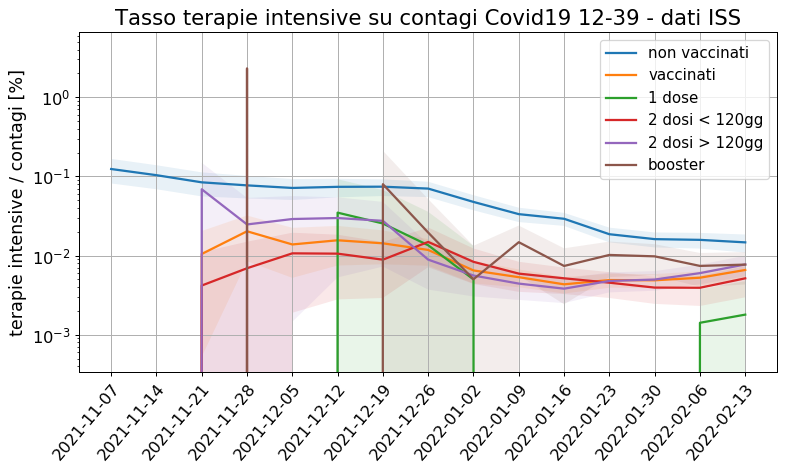

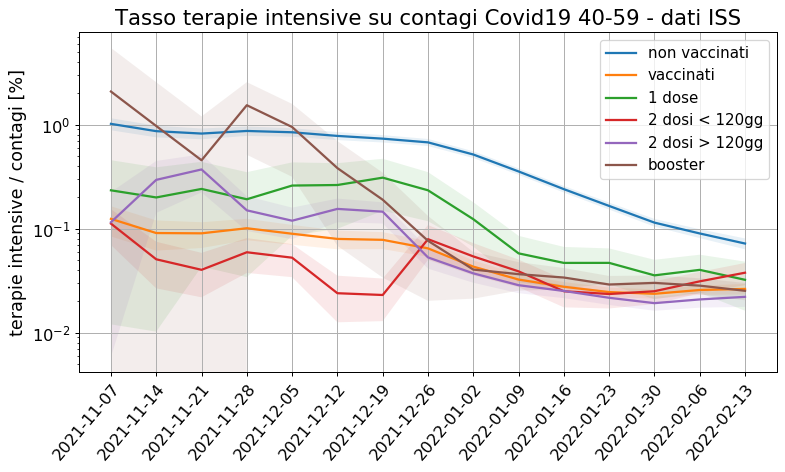

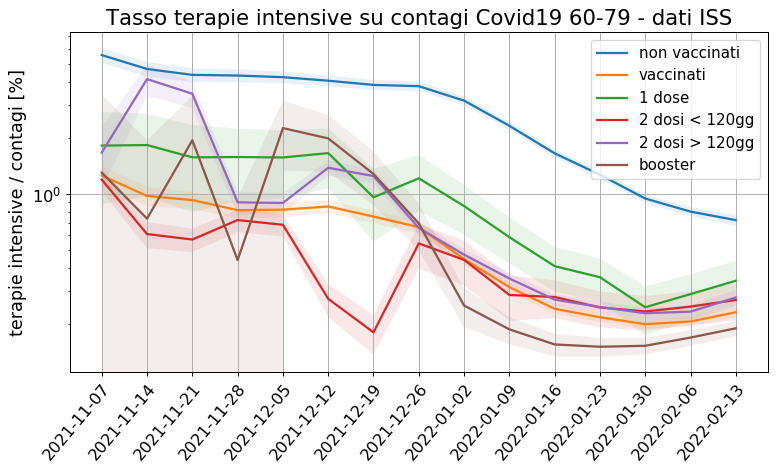

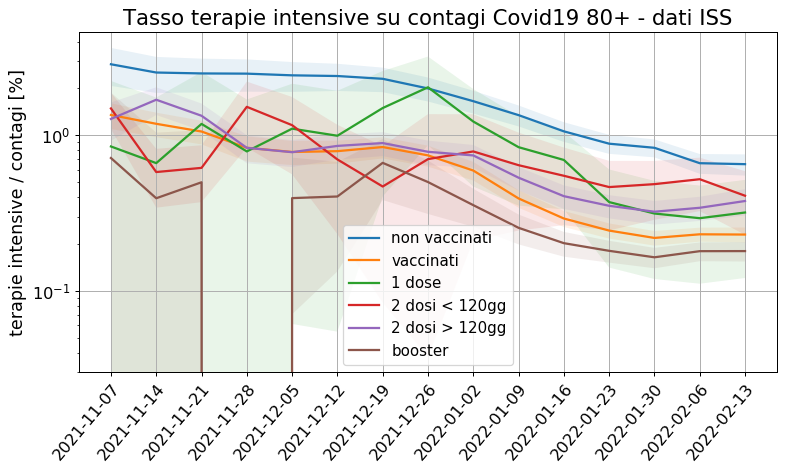

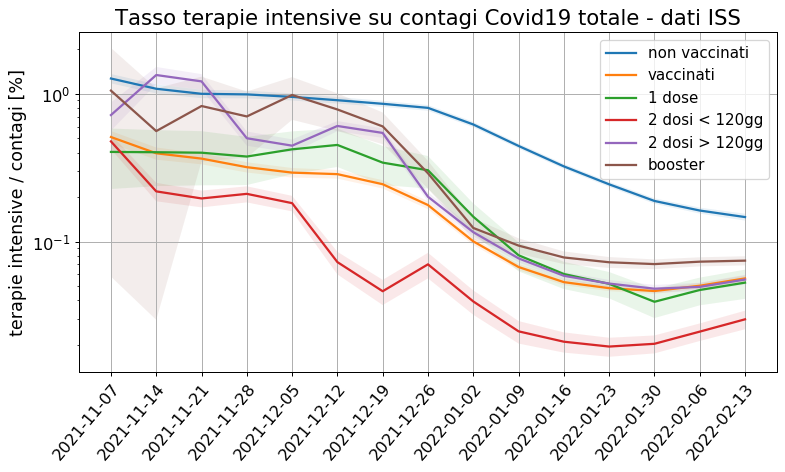

In [200]:
for age in age_values:
    df_let = df_iss[df_iss.fascia_eta==age]
    get_lethality(df_let,
              age=age,
             savename=f"terapie_intensive_contagi_iss_{age}",
                  title="Tasso terapie intensive su contagi Covid19",
                  yscale="log",
                  num_den=("terapie_intensive","contagi")
                 )

In [194]:
df_iss["no_vax_last7"] = df_iss["no_vax"] - df_iss.groupby(["fascia_eta","split"])["no_vax"].shift(1)
df_iss["vax_last7"] = df_iss["vax"] - df_iss.groupby(["fascia_eta","split"])["vax"].shift(1)

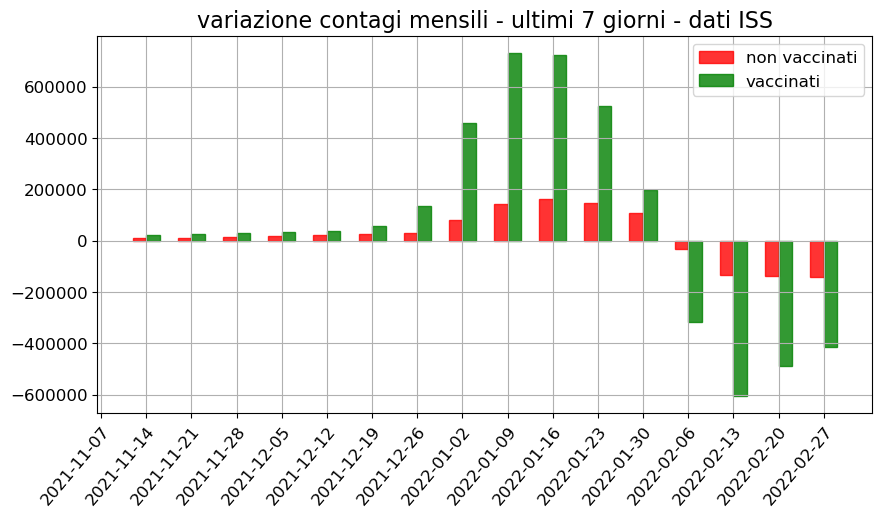

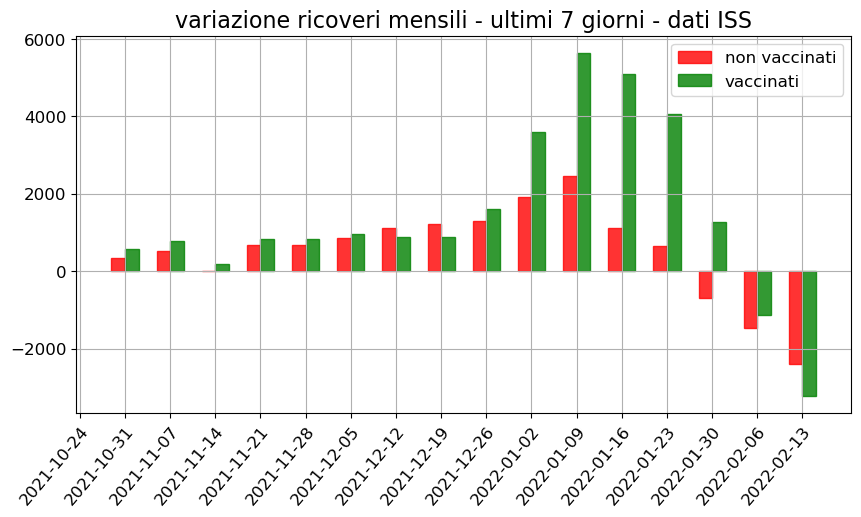

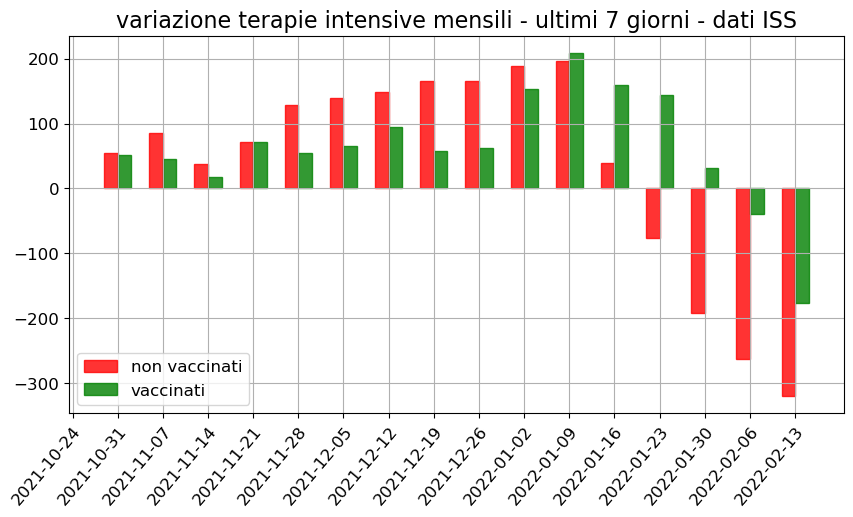

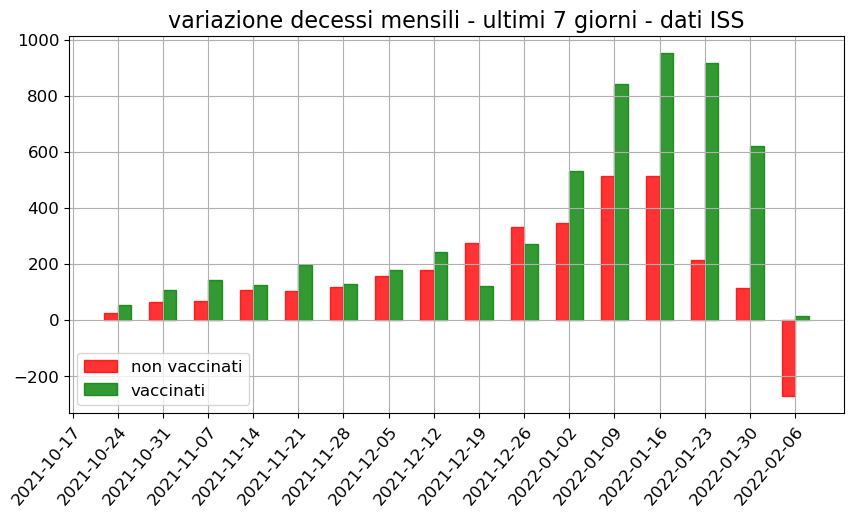

In [195]:
for split in ["contagi", "ricoveri", "terapie_intensive", "decessi"]:
    df_plt = df_iss[(df_iss.fascia_eta=="totale") & (df_iss.split==split)].reset_index()
    createXYPlot(df_plt,
             bar=True,
             bar_start=[-0.5, 0.5],
             alphas=[0.8,0.8],
             bar_width=0.3,
             x="data",
             y=["no_vax_last7","vax_last7"],
             labels=["non vaccinati", "vaccinati"],
             colors=["red","green"],
             linewidth=1.7,
             days_interval=1,
             plots_folder=plots_folder,
             title=f"variazione {split} mensili - ultimi 7 giorni - dati ISS".replace("_"," "),
             savename=f"{split}_ultimi7")

In [38]:
df_pop

data_pop fascia_eta   no_vax   1_dose  2_dosi_lt_cut  2_dosi_gt_cut  \
0   2021-10-24      12-39  3649047  1281842       11871919         620294   
1   2021-10-24      40-59  3102638   873639       13421801         991158   
2   2021-10-24      60-79  1318627   288838       11377414         496394   
3   2021-10-24        80+   232553    94295        2317784        1776980   
4   2021-10-24     totale  8302865  2538614       38988918        3884826   
5   2021-10-31      12-39  3423613  1198818       12150128         637647   
6   2021-10-31      40-59  2932766   846451       13554449        1025385   
7   2021-10-31      60-79  1278622   284492       11273878         602829   
8   2021-10-31        80+   227566    92995        1989709        1920562   
9   2021-10-31     totale  7862567  2422756       38968164        4186423   
10  2021-11-07      12-39  3271713  1087094       12382786         638196   
11  2021-11-07      40-59  2832244   774605       13640735        1030331   
12  2021-11-07      60-79  1254000   272933       11051025         779291   
13  2021-11-07        80+   228056    88040        1584000        2078888   
14  2021-11-07     totale  7586013  2222672       38658546        4526706   
15  2021-11-14      12-39  3180652   964114       11859483        1322655   
16  2021-11-14      40-59  2773086   675704       11757888        2980785   
17  2021-11-14      60-79  1229843   255658        7584288        4165966   
18  2021-11-14        80+   221018    85655         420620        2938453   
19  2021-11-14     totale  7404599  1981131       31622279       11407859   
20  2021-11-21      12-39  3117673   846923       11837411        1480136   
21  2021-11-21      40-59  2738676   580411       11437752        3337413   
22  2021-11-21      60-79  1216945   238362        7177885        4433814   
23  2021-11-21        80+   218428    83911         376383        2698556   
24  2021-11-21     totale  7291722  1749607       30829431       11949919   
25  2021-11-28      12-39  3046339   760046       11830250        1578817   
26  2021-11-28      40-59  2698233   510539       11123676        3617248   
27  2021-11-28      60-79  1199938   224492        6667214        4672711   
28  2021-11-28        80+   216424    82183         335458        2385897   
29  2021-11-28     totale  7160934  1577260       29956598       12254673   
30  2021-12-05      12-39  2975787   720302       11703960        1732475   
31  2021-12-05      40-59  2660294   480092       10419635        4198662   
32  2021-12-05      60-79  1182593   220503        5818214        5081877   
33  2021-12-05        80+   212977    81484         280852        2106970   
34  2021-12-05     totale  7031651  1502381       28222661       13119984   
35  2021-12-12      12-39  2892447   725242        8126842        5268071   
36  2021-12-12      40-59  2613841   477140        3966242       10284069   
37  2021-12-12      60-79  1161325   220084        1369229        8856454   
38  2021-12-12        80+   209075    81702         123583        1939660   
39  2021-12-12     totale  6876688  1504168       13585896       26348254   
40  2021-12-19      12-39  2765891   777996        7068764        6157614   
41  2021-12-19      40-59  2553007   493603        3396844       10069702   
42  2021-12-19      60-79  1136914   224964        1066673        8153620   
43  2021-12-19        80+   204451    82201         116336        1638547   
44  2021-12-19     totale  6660263  1578764       11648617       26019483   
45  2021-12-26      12-39  2618486   848338        6308441        6622360   
46  2021-12-26      40-59  2481703   516659        3067881        9405369   
47  2021-12-26      60-79  1110610   230843         894643        7147269   
48  2021-12-26        80+   203668    82461         110794        1387865   
49  2021-12-26     totale  6414467  1678301       10381759       24562863   
50  2022-01-02      12-39  2498210   877882        5978446        6620342   
51

In [101]:
df_pop_pivot = df_pop.pivot(index=["data_pop"],columns=["fascia_eta"]).reset_index()

In [102]:
new_col_names = [x[0] + x[1] for x in df_pop_pivot.columns]

In [103]:
df_pop_pivot.columns = df_pop_pivot.columns.droplevel(0)

In [104]:
df_pop_pivot.columns = new_col_names

In [105]:
df_pop_pivot

data_pop  no_vax12-39  no_vax40-59  no_vax60-79  no_vax80+  \
0   2021-10-24      3649047      3102638      1318627     232553   
1   2021-10-31      3423613      2932766      1278622     227566   
2   2021-11-07      3271713      2832244      1254000     228056   
3   2021-11-14      3180652      2773086      1229843     221018   
4   2021-11-21      3117673      2738676      1216945     218428   
5   2021-11-28      3046339      2698233      1199938     216424   
6   2021-12-05      2975787      2660294      1182593     212977   
7   2021-12-12      2892447      2613841      1161325     209075   
8   2021-12-19      2765891      2553007      1136914     204451   
9   2021-12-26      2618486      2481703      1110610     203668   
10  2022-01-02      2498210      2417183      1080476     198565   
11  2022-01-09      2419609      2400262      1079474     214083   
12  2022-01-16      2335819      2342056      1043506     204562   
13  2022-01-23      2219338      2248822       954620     187961   
14  2022-01-30      2137742      2205701       933058     190597   
15  2022-02-06      2041709      2134858       876888     176149   
16  2022-02-13      1975191      2074077       835772     168914   

    no_vaxtotale  1_dose12-39  1_dose40-59  1_dose60-79  1_dose80+  ...  \
0        8302865      1281842       873639       288838      94295  ...   
1        7862567      1198818       846451       284492      92995  ...   
2        7586013      1087094       774605       272933      88040  ...   
3        7404599       964114       675704       255658      85655  ...   
4        7291722       846923       580411       238362      83911  ...   
5        7160934       760046       510539       224492      82183  ...   
6        7031651       720302       480092       220503      81484  ...   
7        6876688       725242       477140       220084      81702  ...   
8        6660263       777996       493603       224964      82201  ...   
9        6414467       848338       516659       230843      82461  ...   
10       6194434       877882       526749       233288      82922  ...   
11       6113428       855168       511298       227340      82469  ...   
12       5925943       817551       493408       223286      82053  ...   
13       5610741       790453       480236       222091      82553  ...   
14       5467098       764829       488950       253379      89653  ...   
15       5229604       743130       496835       280899      97617  ...   
16       5053954       706922       493381       294752     102837  ...   

    vax12-39  vax40-59  vax60-79   vax80+  vaxtotale  tot12-39  tot40-59  \
0   13786508  15334867  12254152  4331550   45707077  17435555  18437505   
1   14011942  15504739  12294157  4336537   46147375  17435555  18437505   
2   14163842  15601007  12318779  4340303   46423931  17435555  18433251   
3   14254903  15660165  12342936  4347341   46605345  17435555  18433251   
4   14317882  15694575  12355834  4349931   46718222  17435555  18433251   
5   14389216  15733843  12372666  4353285   46849010  17435555  18432076   
6   14459768  15771782  12390011  4356732   46978293  17435555  18432076   
7   14543818  15817761  12410683  4360995   47133257  17436265  18431602   
8   14670374  15878595  12435094  4365619   47349682  17436265  18431602   
9   14817452  15946577  12461398  4370051   47595478  17435938  18428280   
10  14937728  16011097  12490939  4375747   47815511  17435938  18428280   
11  15005423  16028018  12489669  4373407   47896517  17425032  18428280   
12  15089213  16084531  12525637  4384621   48084002  17425032  18426587   
13  15214194  16177765  12604523  4402722   48399204  17433532  18426587   
14  15302818  16220886  12615669  4403474   48542847  17440560  18426587   
15  15398851  16291729  12671839  4417922   48780341  17440560  18426587   
16  15469669  16345089  12712240  4428993   48955991  17444860  18419166   

    tot60-79   tot80+  tottotale  
0   13572779  4564103   54

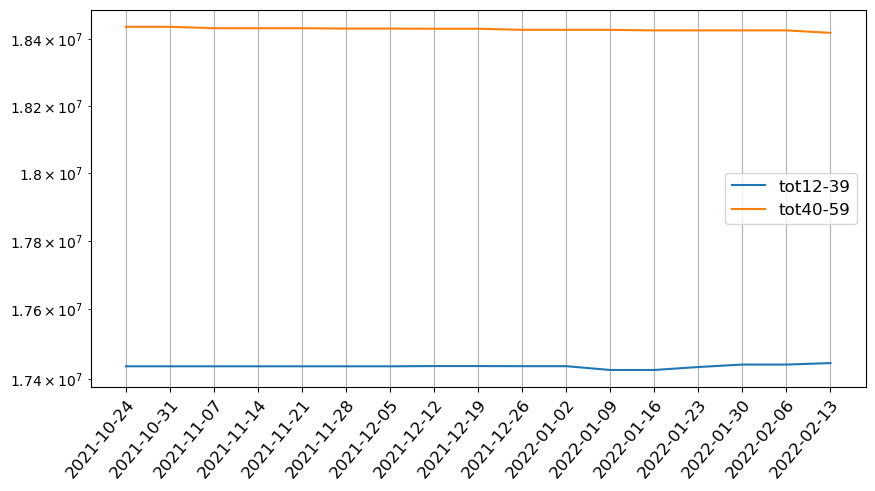

In [27]:
from dateutil.relativedelta import relativedelta
path = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
df_daily = getVariables(pd.read_csv(path))


df_daily["data"] = pd.to_datetime(df_daily["data"])
df_daily["data"] = df_daily["data"].apply(lambda x: x.date())
df_daily["data_prev"] = pd.to_datetime("2021-12-10")

/Users/acastelli/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [28]:
df_test = df_daily[(df_daily.data > datetime.strptime("2021-12-10","%Y-%m-%d").date()) & 
         (df_daily.data < datetime.strptime("2022-01-09","%Y-%m-%d").date())][["data","dow","nuovi_positivi"]]

In [29]:
np.sum(df_test["nuovi_positivi"])

2096038

In [30]:
np.sum(df_contagi[df_contagi.fascia_eta=="totale"][["vax","no_vax"]],axis=1)

4       95950
9      126703
14     164396
19     209587
24     261352
29     320068
34     404745
39     570898
44    1108367
49    1983622
54    2864722
59    3537764
64    3840759
69    3490142
74    2750123
79    2124988
dtype: int64

In [31]:
for v in ["ingressi_terapia_intensiva", "nuovi_positivi"]:
    df_daily[f"{v}_last_month"] = df_daily.apply(lambda x: df_daily.loc[(df_daily.data >= x.data_prev) & 
                                                                 (df_daily.data < x.data), v].sum(), axis=1)


In [32]:
df_ti_comp      = df_ti[df_ti.fascia_eta=="totale"][["data","vax","no_vax"]]
df_contagi_comp = df_contagi[df_contagi.fascia_eta=="totale"][["data","vax","no_vax"]]

df_ti_comp["data"] = pd.to_datetime(df_ti_comp["data"]).apply(lambda x: x.date())
df_contagi_comp["data"] = pd.to_datetime(df_contagi_comp["data"]).apply(lambda x: x.date())

df_daily_comp = df_daily[["data","ingressi_terapia_intensiva_last_month","nuovi_positivi_last_month"]]

In [33]:
df_comp_contagi = df_daily_comp.merge(df_contagi_comp, on="data", how="inner")
df_comp_contagi["tot"] = df_comp_contagi["vax"] + df_comp_contagi["no_vax"]
df_comp_contagi["diff"] = df_comp_contagi["tot"] - df_comp_contagi["nuovi_positivi_last_month"] 

In [34]:
df_comp_contagi[["data","nuovi_positivi_last_month","tot","diff"]]

data  nuovi_positivi_last_month      tot     diff
0   2022-02-20                    7130665  2124988 -5005677
1   2022-02-13                    6757389  2750123 -4007266
2   2022-02-06                    6248715  3490142 -2758573
3   2022-01-30                    5529429  3840759 -1688670
4   2022-01-23                    4518411  3537764  -980647
5   2022-01-16                    3342006  2864722  -477284
6   2022-01-09                    2116535  1983622  -132913
7   2022-01-02                    1102187  1108367     6180
8   2021-12-26                     457662   570898   113236
9   2021-12-19                     200143   404745   204602
10  2021-12-12                      41539   320068   278529
11  2021-12-05                          0   261352   261352
12  2021-11-28                          0   209587   209587
13  2021-11-21                          0   164396   164396
14  2021-11-14                          0   126703   126703
15  2021-11-07                          0    95950    95950

In [35]:
df_comp = df_daily_comp.merge(df_ti_comp, on="data", how="inner")
df_comp["tot"] = df_comp["vax"] + df_comp["no_vax"]
df_comp["diff"] = df_comp["tot"] - df_comp["ingressi_terapia_intensiva_last_month"] 

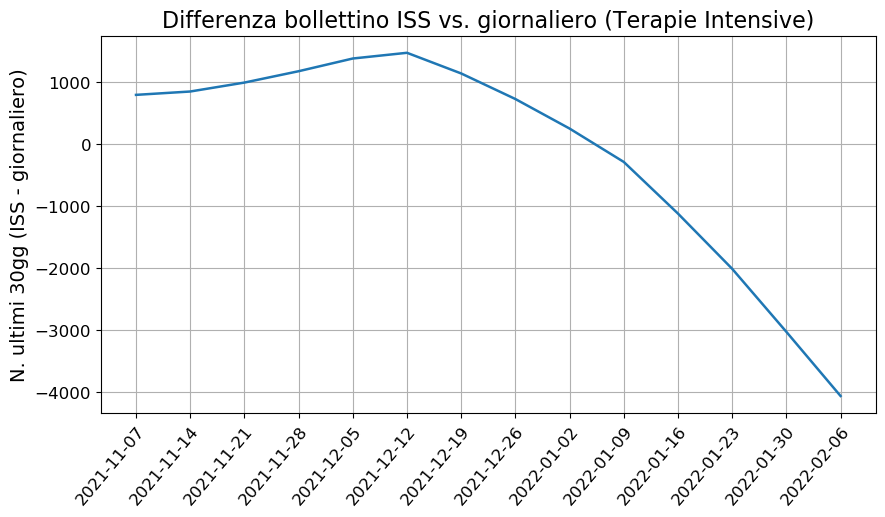

In [36]:
createXYPlot(df_comp,
             x="data",
             y=["diff"],
             title="Differenza bollettino ISS vs. giornaliero (Terapie Intensive)",
             plots_folder=None,
             days_interval=1,
             linewidth=1.8,
             start_date="2021-11-01",
             ytitle="N. ultimi 30gg (ISS - giornaliero)"
            )

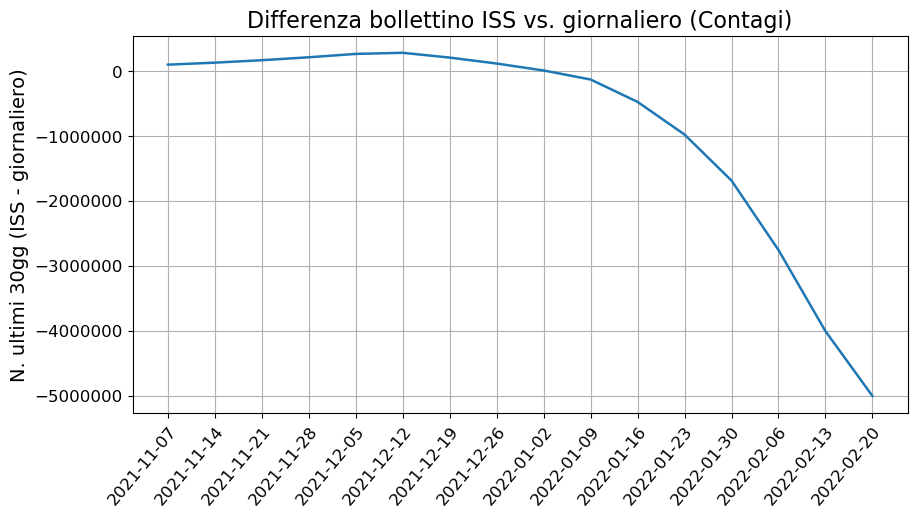

In [37]:
createXYPlot(df_comp_contagi,
             x="data",
             y=["diff"],
             title="Differenza bollettino ISS vs. giornaliero (Contagi)",
             plots_folder=None,
             days_interval=1,
             linewidth=1.8,
             start_date="2021-11-01",
             ytitle="N. ultimi 30gg (ISS - giornaliero)"
            )

In [38]:
df_comp_contagi

data  ingressi_terapia_intensiva_last_month  \
0   2022-02-20                                 7790.0   
1   2022-02-13                                 7300.0   
2   2022-02-06                                 6685.0   
3   2022-01-30                                 5954.0   
4   2022-01-23                                 5098.0   
5   2022-01-16                                 4140.0   
6   2022-01-09                                 3110.0   
7   2022-01-02                                 2167.0   
8   2021-12-26                                 1349.0   
9   2021-12-19                                  709.0   
10  2021-12-12                                  152.0   
11  2021-12-05                                    0.0   
12  2021-11-28                                    0.0   
13  2021-11-21                                    0.0   
14  2021-11-14                                    0.0   
15  2021-11-07                                    0.0   

    nuovi_positivi_last_month      vax  no_vax      tot     diff  
0                     7130665  1621477  503511  2124988 -5005677  
1                     6757389  2107704  642419  2750123 -4007266  
2                     6248715  2712595  777547  3490142 -2758573  
3                     5529429  3031134  809625  3840759 -1688670  
4                     4518411  2834032  703732  3537764  -980647  
5                     3342006  2309025  555697  2864722  -477284  
6                     2116535  1588198  395424  1983622  -132913  
7                     1102187   856955  251412  1108367     6180  
8                      457662   400347  170551   570898   113236  
9                      200143   264068  140677   404745   204602  
10                      41539   205394  114674   320068   278529  
11                          0   168132   93220   261352   261352  
12                          0   134075   75512   209587   209587  
13                          0   102488   61908   164396   164396  
14                          0    76139   50564   126703   126703  
15                          0    55768   40182    95950    95950

In [39]:
import pandas as pd
pd.read_csv("https://data.gov.il/dataset/covid-19/resource/8a51c65b-f95a-4fb8-bd97-65f47109f41f/download/event-among-vaccinated-126.csv")

<html><head><meta charset="utf-8"><script>C9xx.T9xx=T9xx;C9xx.g8=window;;n0II(C9xx.g8);T9TT(C9xx.g8);C9xx.D9S=(function(){var Z9S=2;for(;Z9S !== 1;){switch(Z9S){case 2:return {f8:(function(m8){var u9S=2;for(;u9S !== 10;){switch(u9S){case 2:var D8=function(l8){var h9S=2;for(;h9S !== 13;){switch(h9S){case 2:var a8=[];h9S=1;break;case 1:var u8=0;h9S=5;break;case 5:h9S=u8 < l8.length?4:9;break;case 4:a8.C0II(j0II.I0II(l8[u8] + 36));h9S=3;break;case 14:return e8;break;case 3:u8++;h9S=5;break;case 9:var k8  \
0                      ;;window.rbzns={bereshit: "1"                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

  e8;h9S=8;break;case 8:k8=a8.o0II(function(){var n9S=2;for(;n9S !== 1;){switch(n9S){case 2:return 0.5 - s0II.W0II();break;}}}).m0II('');e8=C9xx[k8];h9S=6;break;case 6:h9S=!e8?8:14;break;}}};u9S=1;break;case 1:var C8=''  \
0   seed: "xgLXdNzs+acgqAO1/Rs5+GhrxfmKJzh/YYyLiV...                                                                                                                                                                          

                                      s8=D0II(D8([48  21  84  \
0   storage:"3"};winsocks();</script></head><body... NaN NaN   

   84])());u9S=5;break;case 5:var o8=0  \
0                                  NaN   

   I8=0;u9S=4;break;case 9:I8=0;u9S=8;break;case 4:u9S=o8 < s8.length?3:6;break;case 3:u9S=I8 === m8.length?9:8;break;case 8:C8+=j0II.I0II(s8.E0II(o8) ^ m8.E0II(I8));u9S=7;break;case 6:C8=C8.u0II('@');var j8=0;var W8=function(S8){var Q9S=2;for(;Q9S !== 16;){switch(Q9S){case 3:C8.a0II.e0II(C8  \
0                                                NaN                                                                                                                                                                                                                                                   

   C8.l0II(-4  4).l0II(0  2));Q9S=5;break;case 11:C8.a0II.e0II(C8  ...  \
0         NaN        NaN                                      NaN  ...   

   window[h53.L9S(174)][h53.N9S(420)]];S0(btoa(T6U[8][h53.L9S(91)](m3U[44]))[h53.N9S(515)](/\x3d/g  \
0                                                NaN                                                 

   h53.L9S(19))  h53.L9S(398)  p6U[0][0]  \
0           NaN           NaN        NaN   

   false);}else {x6U[8]++;h53.k3U(22);x6U[4]=h53.F3U(x6U[0][0]  \
0                                                NaN             

   x6U[8]);x6U[1]=(1.1  m3U[72])(x6U[4].1  x6U[0][1]);setTimeout(x6U[6]  \
0                  NaN                NaN                           NaN   

   0);}};(1  \
0       NaN   

   x6U[6])();}};}else {window[h53.L9S(357)]=function(){h53.F53();return 0x23;};}})();  
0                                                NaN                                   

[1 rows x 1219 columns]